# Introduction/Background:

### The data set that i will be using in this assignment, consists of three features, namely: Years of Experience, Level of Interest and Scale of Efficiency, of all which have been obtained from various set of companies which utilizes a services of a single industrial psychology company to help optimize their employees work ethic and professionalism. With all these three features, i will use them in this assignment predict the Employability chances of a person given the 3 sets of features

### Step 1: Importing the necessary libraries

In [3]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('seaborn-poster')
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (12.0, 9.0)

### Step 2: Reading in the data from the .csv file.

In [4]:
data = pd.read_csv('data_input.csv')

### Step 3: Splitting the data into train and data sets, and then displaying that data

In [5]:
train_set, test_set = train_test_split(data, test_size = 0.20)
data

Years Of Experience  Level of Interest  Scale of Efficiency  Employability
0              0.000000           3.440000             0.440000       4.387545
1              0.040404           0.134949             0.888485       2.679650
2              0.080808           0.829899             1.336970       2.968490
3              0.121212           1.524848             1.785455       3.254065
4              0.161616           2.219798             2.233939       3.536375
..                  ...                ...                  ...            ...
95             3.838384           1.460202             3.046061       4.440595
96             3.878788           2.155152             3.494545       4.458663
97             3.919192           2.850101             3.943030       4.479995
98             3.959596           3.545051             0.391515       3.304593
99             4.000000           0.240000             0.840000       5.332455

[100 rows x 4 columns]

### Step 4: Separation of the independent variables and the dependant variable

In [6]:
data_features = train_set.iloc[: , :-1]
data_label = train_set.iloc[: , -1]
display(data_features)

Years Of Experience  Level of Interest  Scale of Efficiency
76             3.070707           0.256162             2.524848
33             1.333333           2.373333             3.240000
56             2.262626           2.357172             1.555152
86             3.474747           3.205657             3.009697
36             1.454545           0.458182             0.585455
..                  ...                ...                  ...
20             0.808081           1.338990             1.409697
2              0.080808           0.829899             1.336970
8              0.323232           0.999596             0.027879
92             3.717172           3.375354             1.700606
89             3.595960           1.290505             0.355152

[80 rows x 3 columns]

### Step 5: Conversion of the independent and dependant variables sets to array

In [7]:
X = data_features.to_numpy()
Y = data_label.to_numpy()

### Step 6: Visualization of the years of Experience and Level of Interest all plotted against the Employability on a 3-D Plane

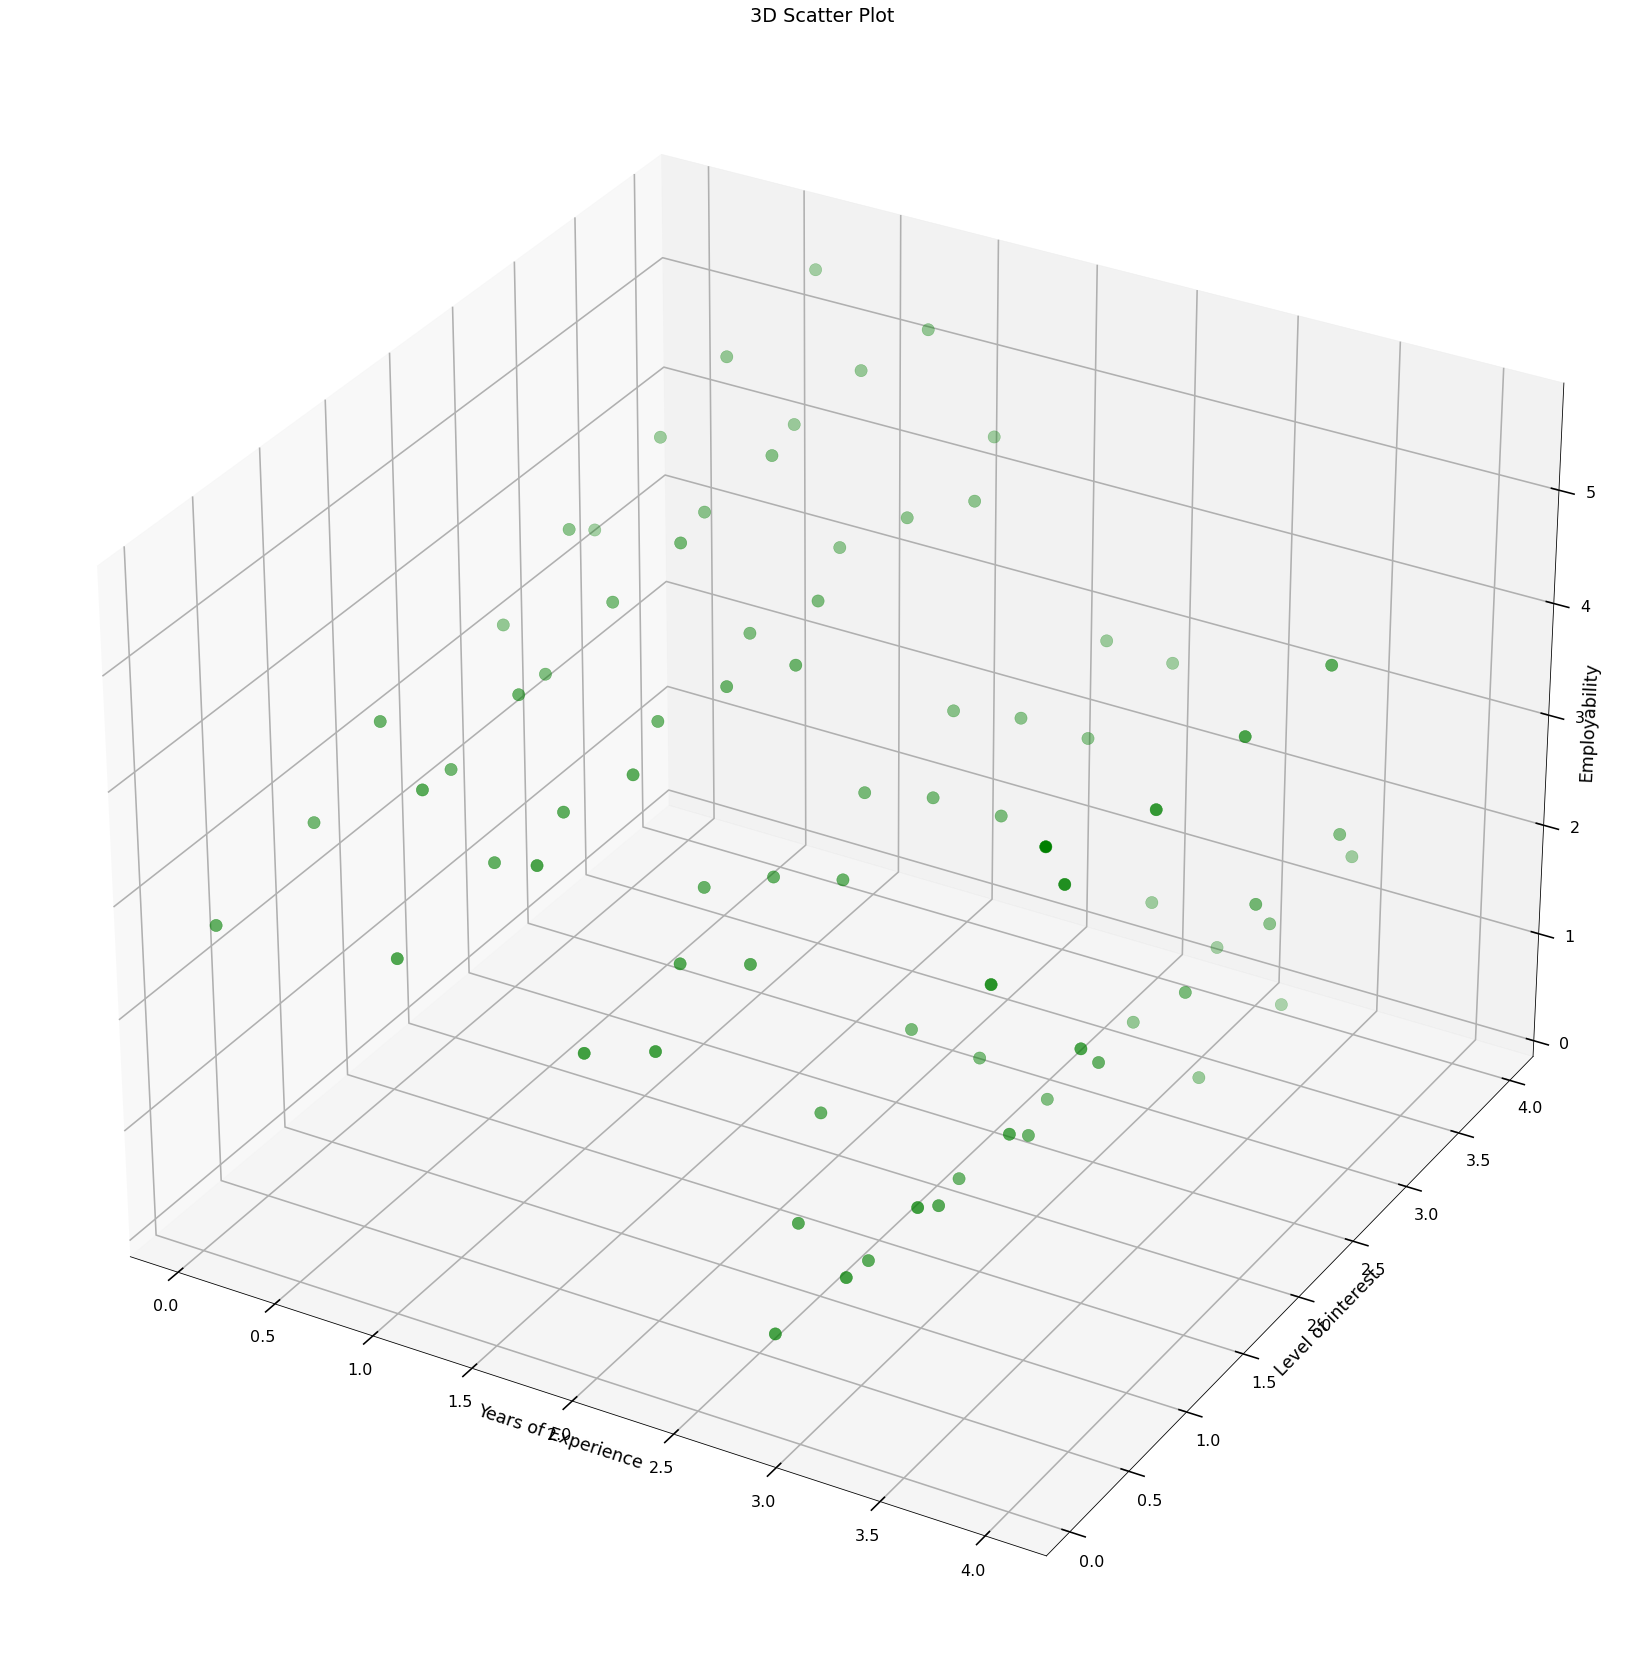

In [8]:
X1 = data_features.iloc[:, 0]
Y1 = data_features.iloc[:, 1]
Z = train_set.iloc[:, -1]

fig = plt.figure(figsize = (30,30))
ax = plt.axes(projection='3d')
ax.grid()
ax.scatter(X1, Y1, Z, c = 'green', s = 150)
ax.set_title('3D Scatter Plot')
ax.set_xlabel("Years of Experience")
ax.set_ylabel("Level of interest")
ax.set_zlabel("Employability") 
plt.show()

### Step 7: Visualization of the Level of Interest and Scale of Efficiency all plotted against the Employability on a 3-D Plane

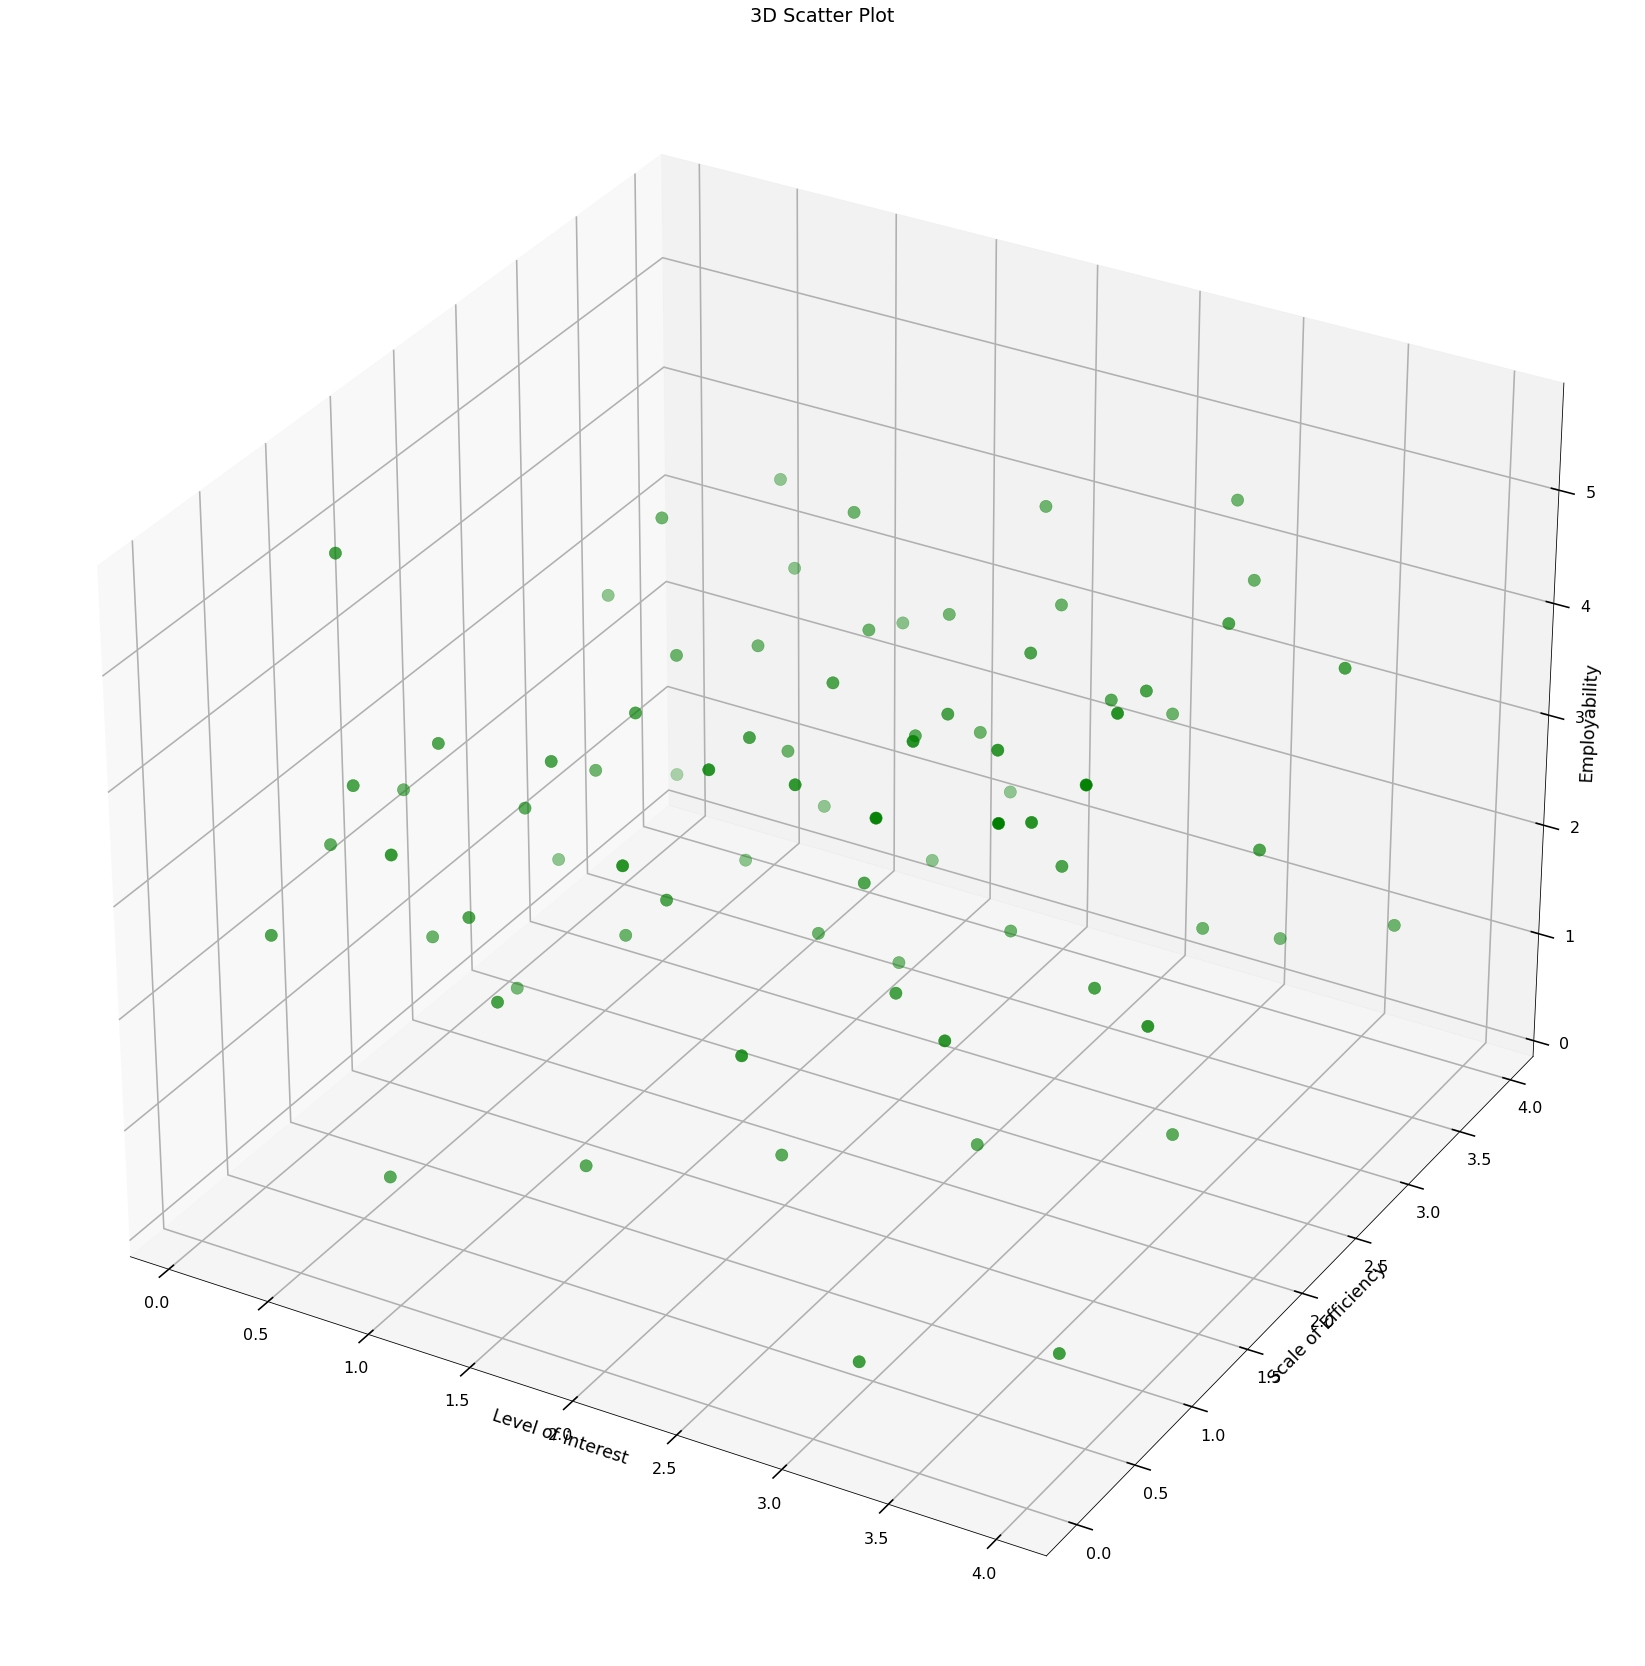

In [9]:
X2 = data_features.iloc[:, 1]
Y2 = data_features.iloc[:, 2]
Z1 = train_set.iloc[:, -1]

fig = plt.figure(figsize = (30,30))
ax = plt.axes(projection='3d')
ax.grid()
ax.scatter(X2, Y2, Z1, c = 'green', s = 150)
ax.set_title('3D Scatter Plot')
ax.set_xlabel("Level of interest")
ax.set_ylabel("Scale of Efficiency")
ax.set_zlabel("Employability") 
plt.show()

### Step 8: Visualization of the years of Experience and Scale of Efficiency all plotted against the Employability on a 3-D Plane

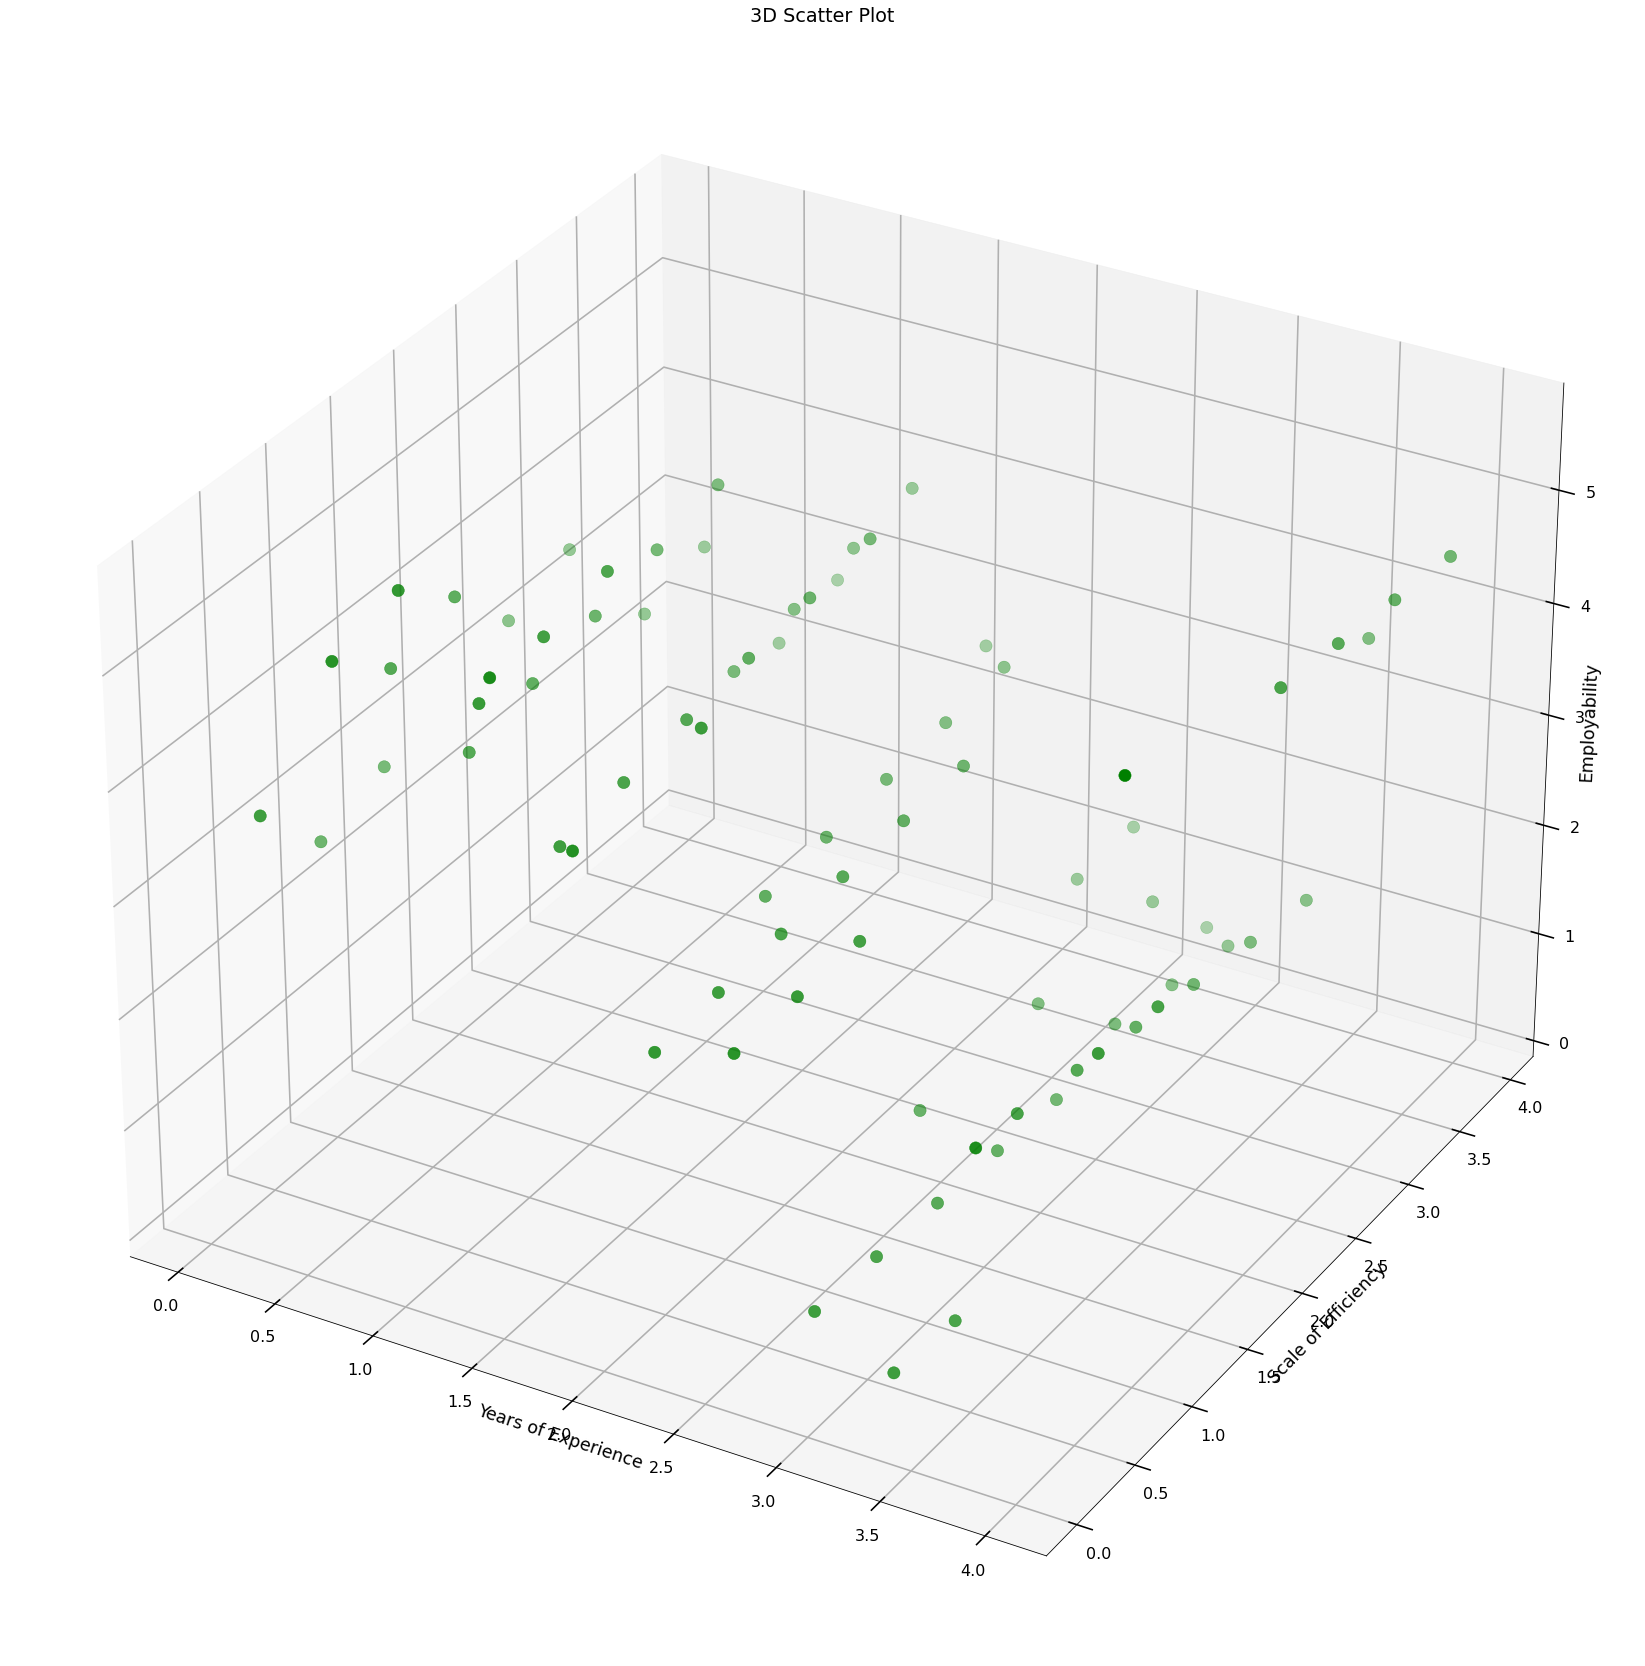

In [10]:
X3 = data_features.iloc[:, 0]
Y3 = data_features.iloc[:, 2]
Z2 = train_set.iloc[:, -1]

fig = plt.figure(figsize = (30,30))
ax = plt.axes(projection='3d')
ax.grid()
ax.scatter(X3, Y3, Z2, c = 'green', s = 150)
ax.set_title('3D Scatter Plot')
ax.set_xlabel("Years of Experience")
ax.set_ylabel("Scale of Efficiency")
ax.set_zlabel("Employability")
plt.show()

### Step 9: From here till the end of the Notebook, Each cell will be properly labelled to cater for the grading for programming part which will be based on the Specific exercises. The number is per the Assignment 1B document which was provided

# 1.Basic implementation of linear regression with gradient descent (using first principles)
### linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable.

In [11]:
def grad_desc(x_train, y_train, learning_rate, max_itr):    
    n = x_train.shape[0]
    ones = np.ones((n,1))
    x_train = np.concatenate((ones, x_train), axis=1)
    num = x_train.shape[1]
    theta = np.ones(num)
    hyp = np.dot(x_train, theta)
    
    #Multivariable Linear Regression with Gradient Descent code part
    cost = np.ones(max_itr)
    for i in range(0, max_itr):
        theta[0] = theta[0] - ((learning_rate/n)*sum(hyp -y_train))
        for j in range(1, num):
            theta[j] = theta[j] - ((learning_rate/n)*sum((hyp -y_train)*x_train[:, j]))
        hyp = np.dot(x_train, theta)
        cost[i] = (1/(2*n))*(sum(np.square(hyp-y_train)))
    return cost, hyp, theta

# 2.Exploring the effect of different learning rates on convergence
## In the following cell's i shall explore effects of different learning rates on convergence under the same number of iterations, i shall also visualize the cost function to show that after how many iterations it converges.

In [12]:
num_itr = 10000   #Declaration of a constant number of iterations

## 2.1 First Exploration
### Within this exploration i have made a visual of how the cost is affected by the 3 features which i have after 10000 iterations and also the first learning rate i am using is very small, a = 0.0001. I have also went further to explore how the hypothesis function would be plotted against 2 features.  
### With this learning rate i asssume convergence from 6000 iterations onwards.

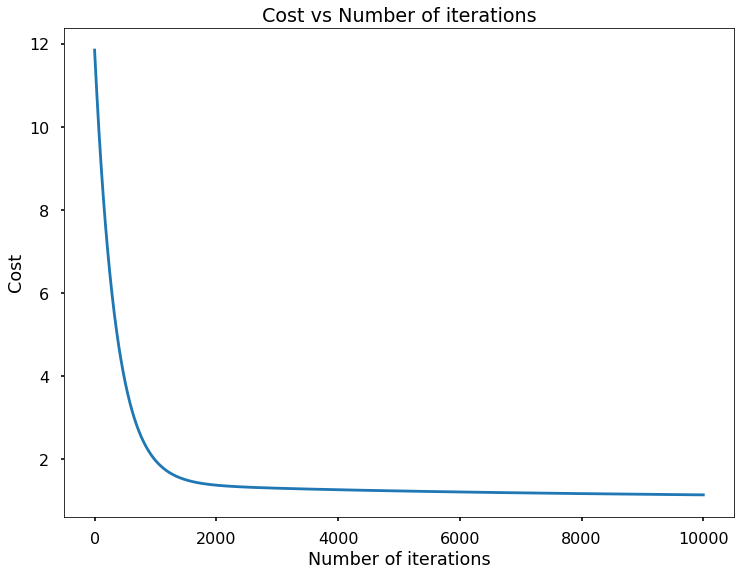

Number of Interation(s): 10000
Learning Rate(Alpha): 0.0001
Lowest cost: 1.1453767665793884
Theta obtained from the grad descent: [ 0.99922513 -0.05512717  0.6038119   0.31903874]


In [13]:
learning_rate1 = 0.0001
cost1, hyp1, theta1 = grad_desc(X, Y, learning_rate1, num_itr)
plt.title("Cost vs Number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.plot(cost1)
plt.show()
print('Number of Interation(s):', num_itr)
print('Learning Rate(Alpha):', learning_rate1)
print('Lowest cost:', str(np.min(cost1)))
print('Theta obtained from the grad descent:', theta1)

### 2.1.1. 1st 3D visualization between Years of Experience, level of interest and then my hypothesis function

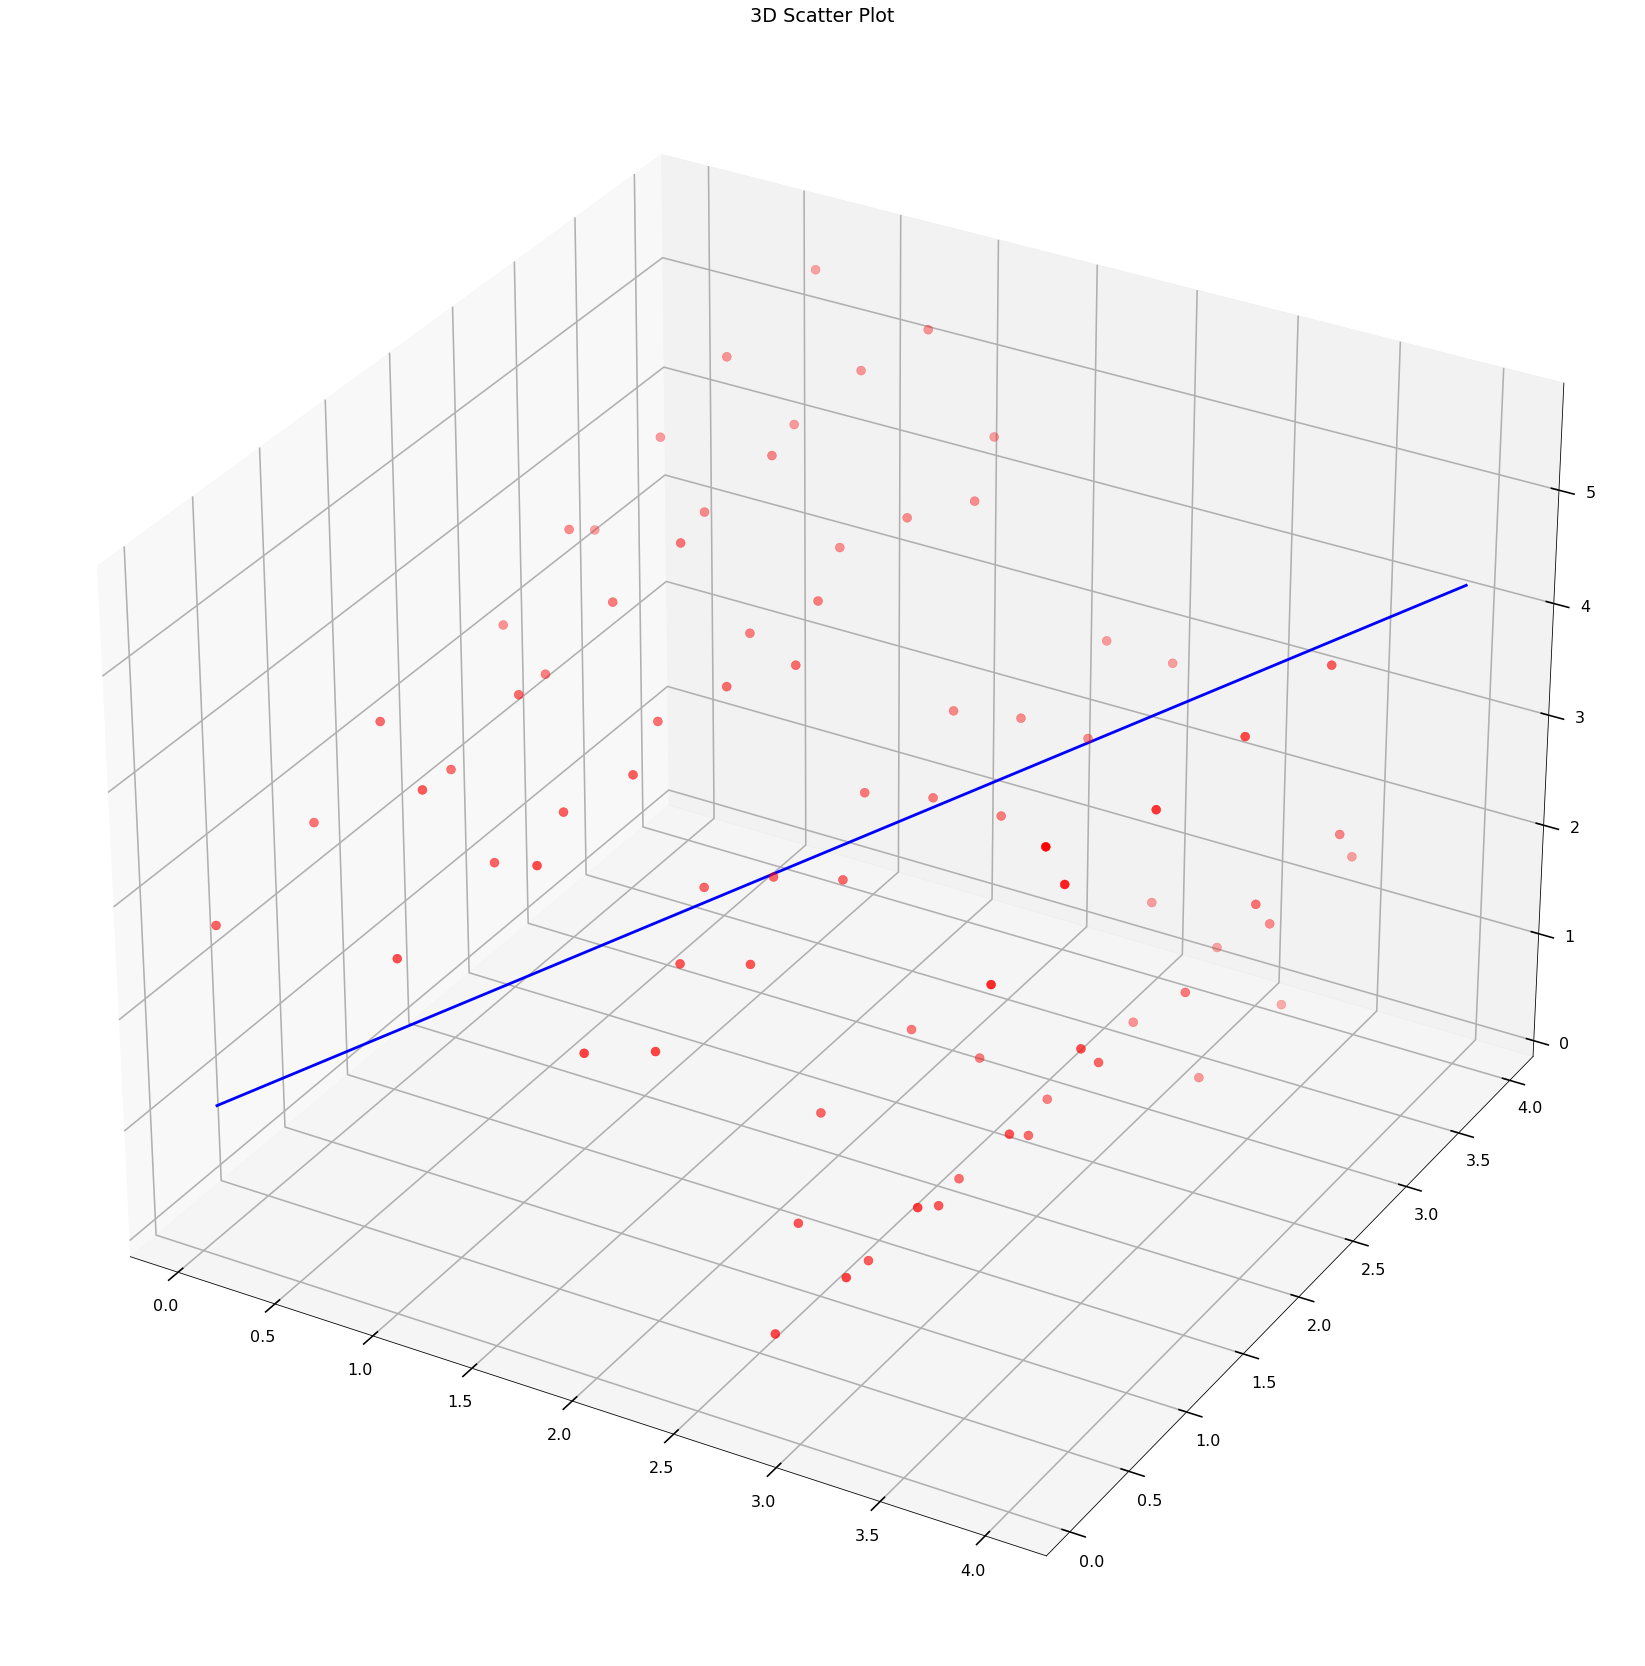

In [14]:
fig = plt.figure(figsize = (30,30))
ax = plt.axes(projection='3d')
X4 = [min(X1), max(X1)]
Y4 = [min(X2), max(X2)]
Z3 = [min(hyp1),max(hyp1)]
ax.plot3D(X4, Y4, Z3, 'Blue')
ax.scatter(X1, X2, Z, c = 'red', s = 80)
ax.set_title('3D Scatter Plot')
plt.show()

### 2.1.2. 2nd 3D visualization between Years of Experience, Scale of Efficiency and then my hypothesis function

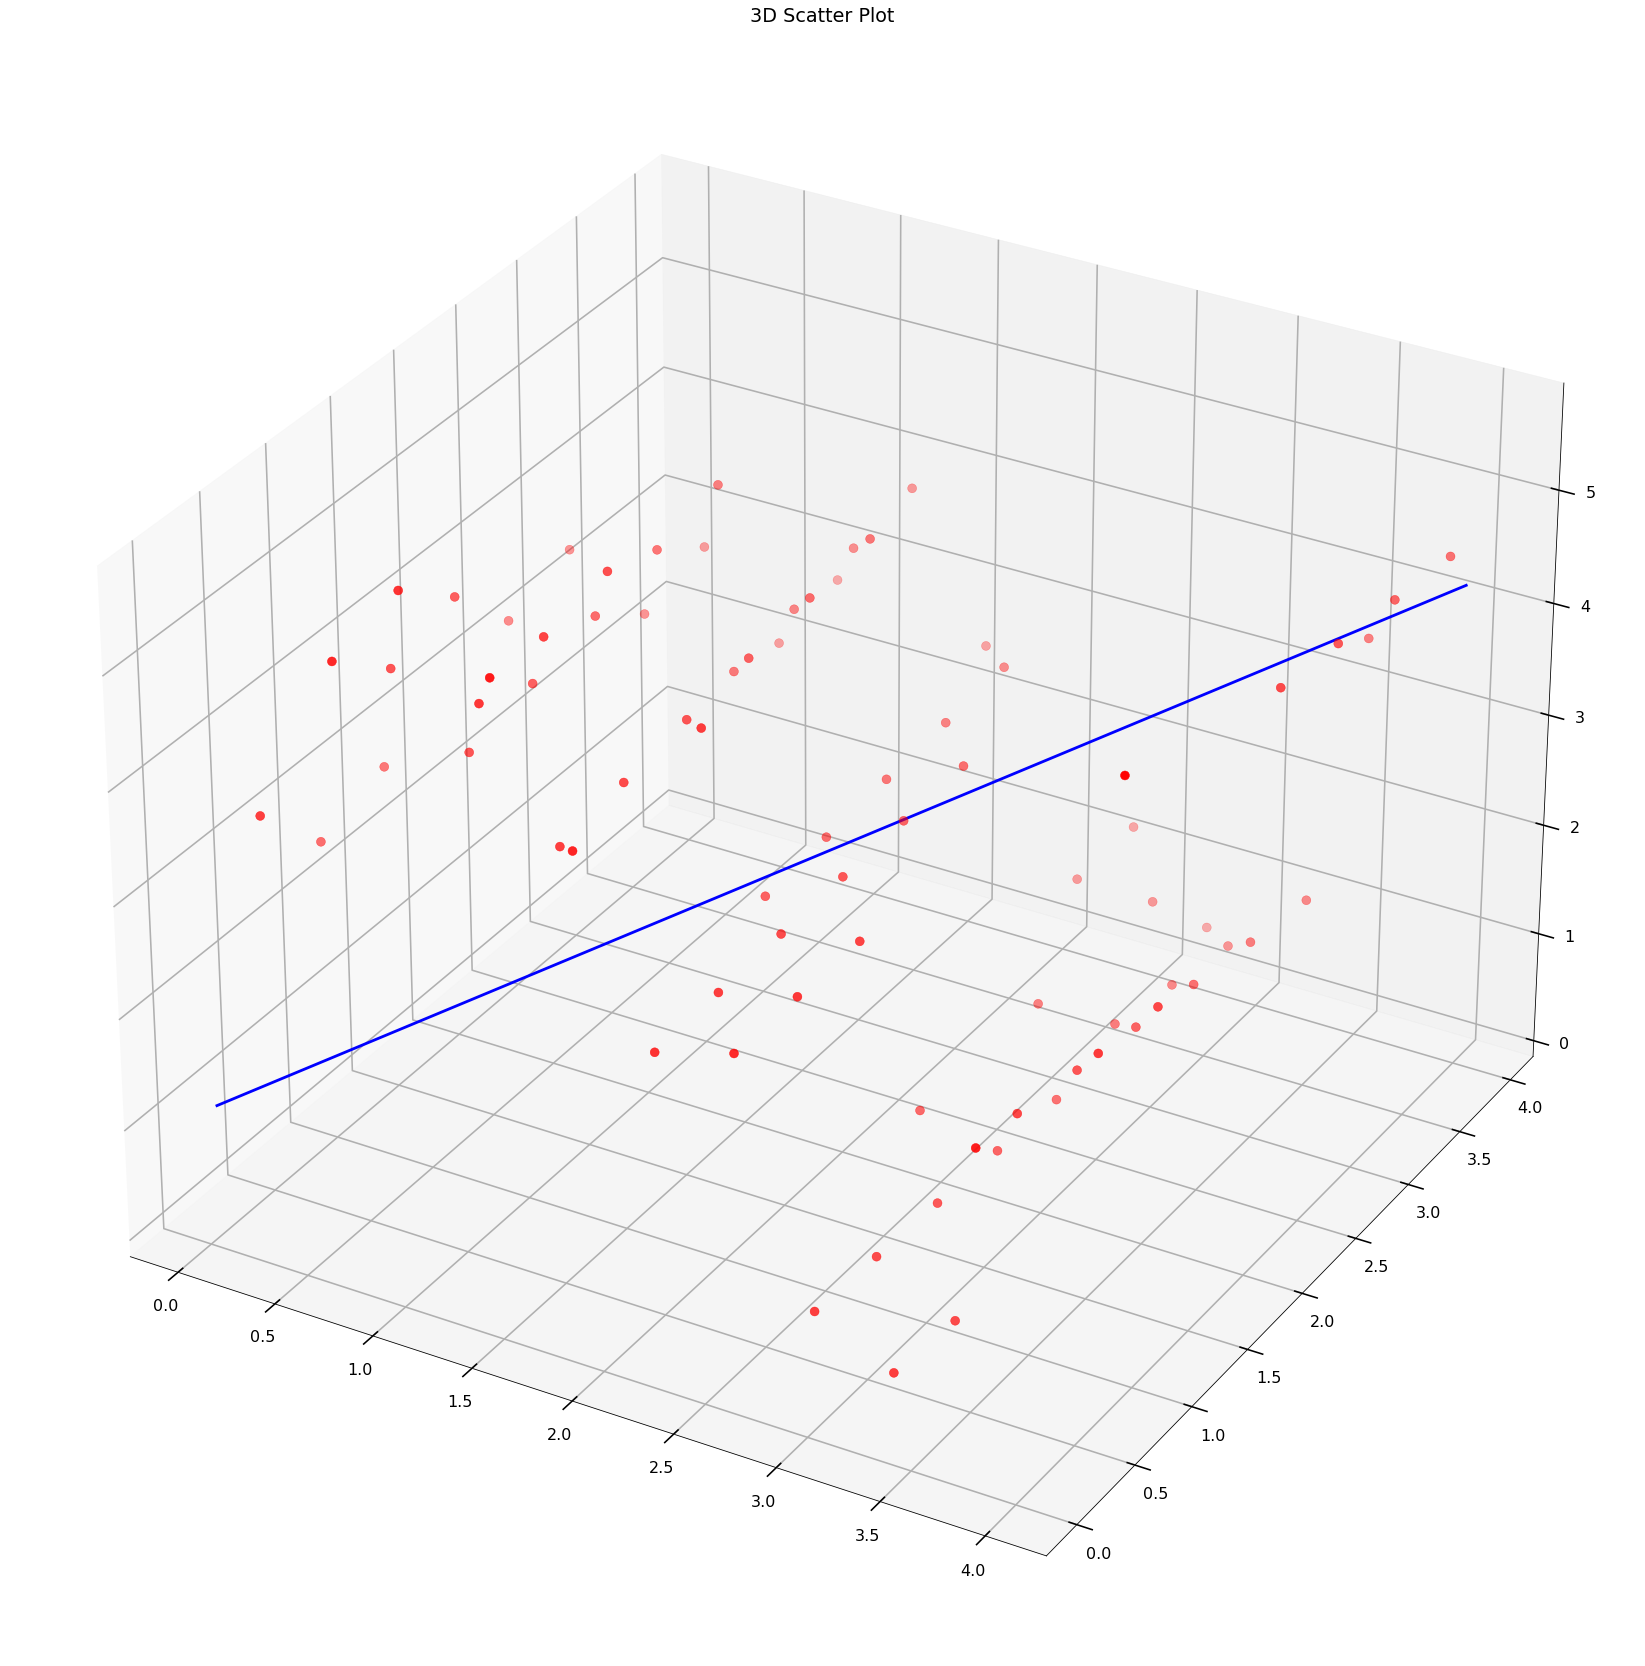

In [15]:
fig = plt.figure(figsize = (30,30))
ax = plt.axes(projection='3d')
X5 = [min(X1), max(X1)]
Y5 = [min(Y2), max(Y2)]
Z4 = [min(hyp1),max(hyp1)]
ax.plot3D(X5, Y5, Z4, 'Blue')
ax.scatter(X1, Y2, Z, c = 'red', s = 80)
ax.set_title('3D Scatter Plot')
plt.show()

### 2.1.3. 3rd 3D visualization between Scale of Efficiency, Level of interest and then my hypothesis function

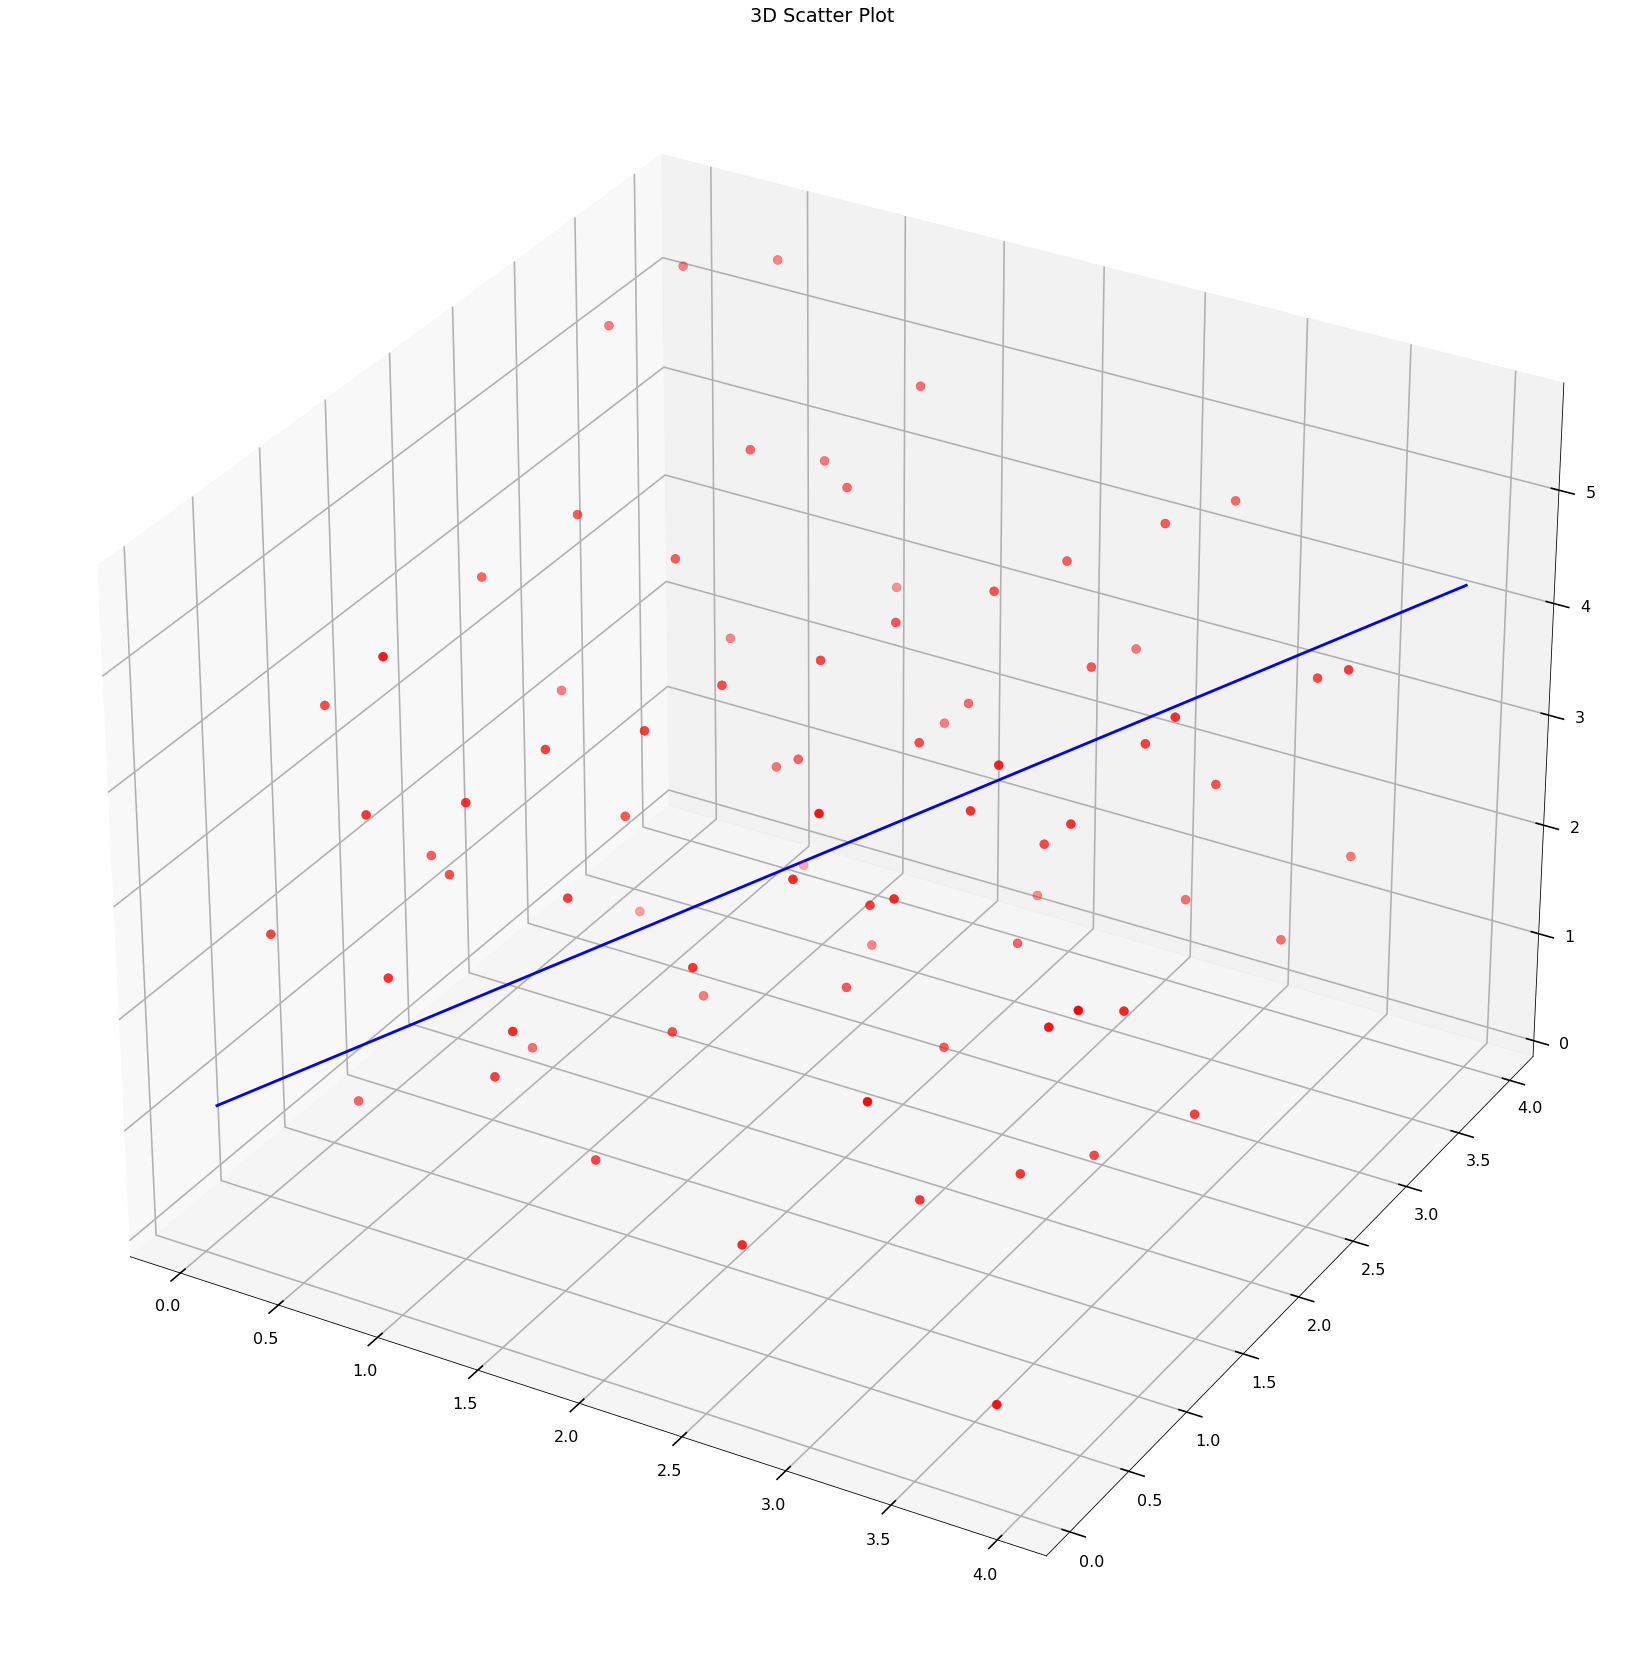

In [16]:
fig = plt.figure(figsize = (30,30))
ax = plt.axes(projection='3d')
X6 = [min(Y2), max(Y2)]
Y6 = [min(X2), max(X2)]
Z5 = [min(hyp1),max(hyp1)]
ax.plot3D(X6, Y6, Z5, 'Blue')
ax.scatter(Y2, X2, Z, c = 'red', s = 80)
ax.set_title('3D Scatter Plot')
plt.show()

## 2.2 Second Exploration
### Within this exploration i have made a visual of how the cost is affected by the 3 features which i have after 10000 iterations and also the second learning rate i am using is, a = 0.001. I have also went further to explore how the hypothesis function would be plotted against 2 features.
### With this learning rate i asssume convergence from 2000 iterations onwards.

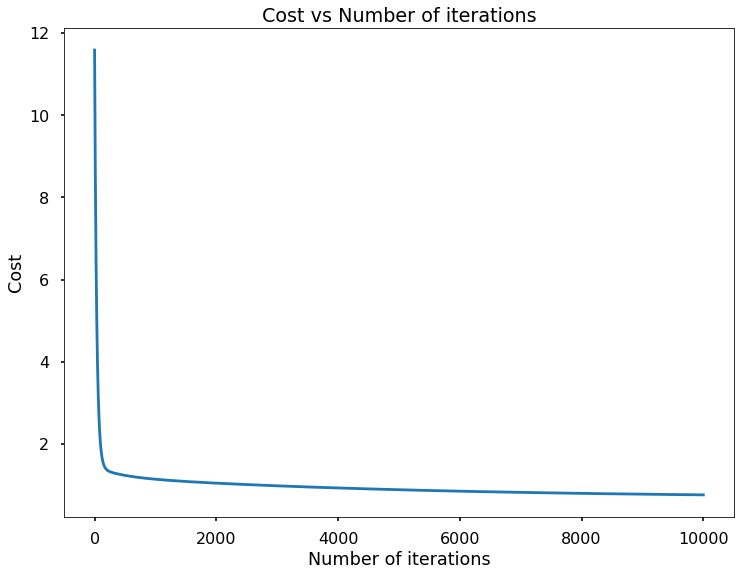

Number of Interation(s): 10000
Learning Rate(Alpha): 0.001
Lowest cost: 0.7651870230264601
Theta obtained from the grad descent: [ 2.69066949 -0.45567832  0.43990745  0.13317914]


In [17]:
learning_rate2 = 0.001
cost2, hyp2, theta2 = grad_desc(X, Y, learning_rate2, num_itr)
plt.title("Cost vs Number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.plot(cost2)
plt.show()
print('Number of Interation(s):', num_itr)
print('Learning Rate(Alpha):', learning_rate2)
print('Lowest cost:', str(np.min(cost2)))
print('Theta obtained from the grad descent:', theta2)

### 2.2.1. 1st 3D visualization between Years of Experience, level of interest and then my hypothesis function

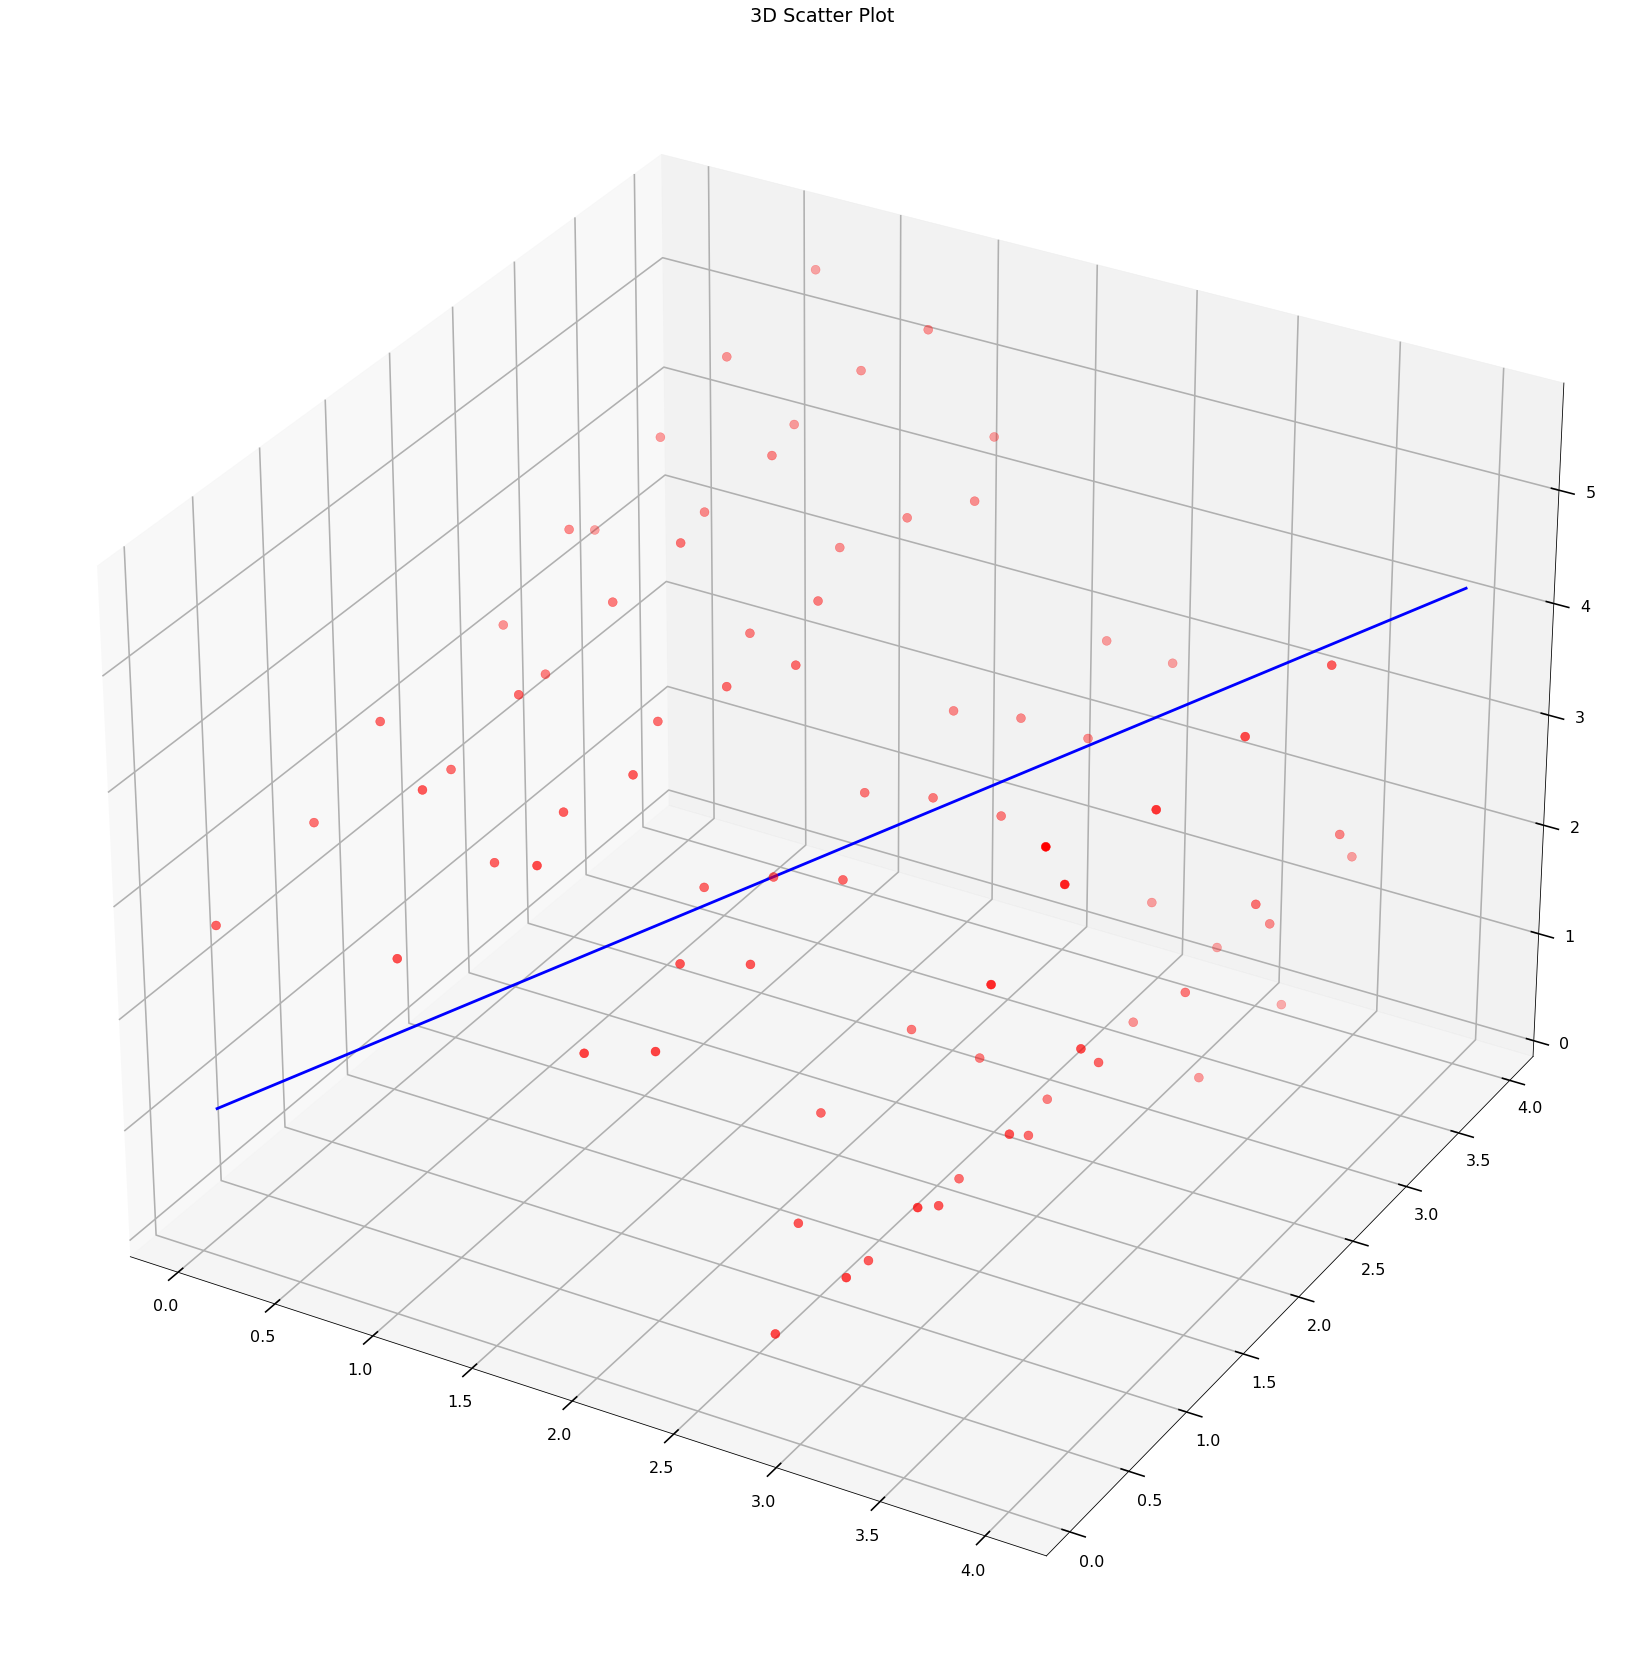

In [18]:
fig = plt.figure(figsize = (30,30))
ax = plt.axes(projection='3d')
X7 = [min(X1), max(X1)]
Y7 = [min(X2), max(X2)]
Z6 = [min(hyp2),max(hyp2)]
ax.plot3D(X7, Y7, Z6, 'Blue')
ax.scatter(X1, X2, Z, c = 'red', s = 80)
ax.set_title('3D Scatter Plot')
plt.show()

### 2.2.2 2nd 3D visualization between Years of Experience, Scale of Efficiency and then my hypothesis function

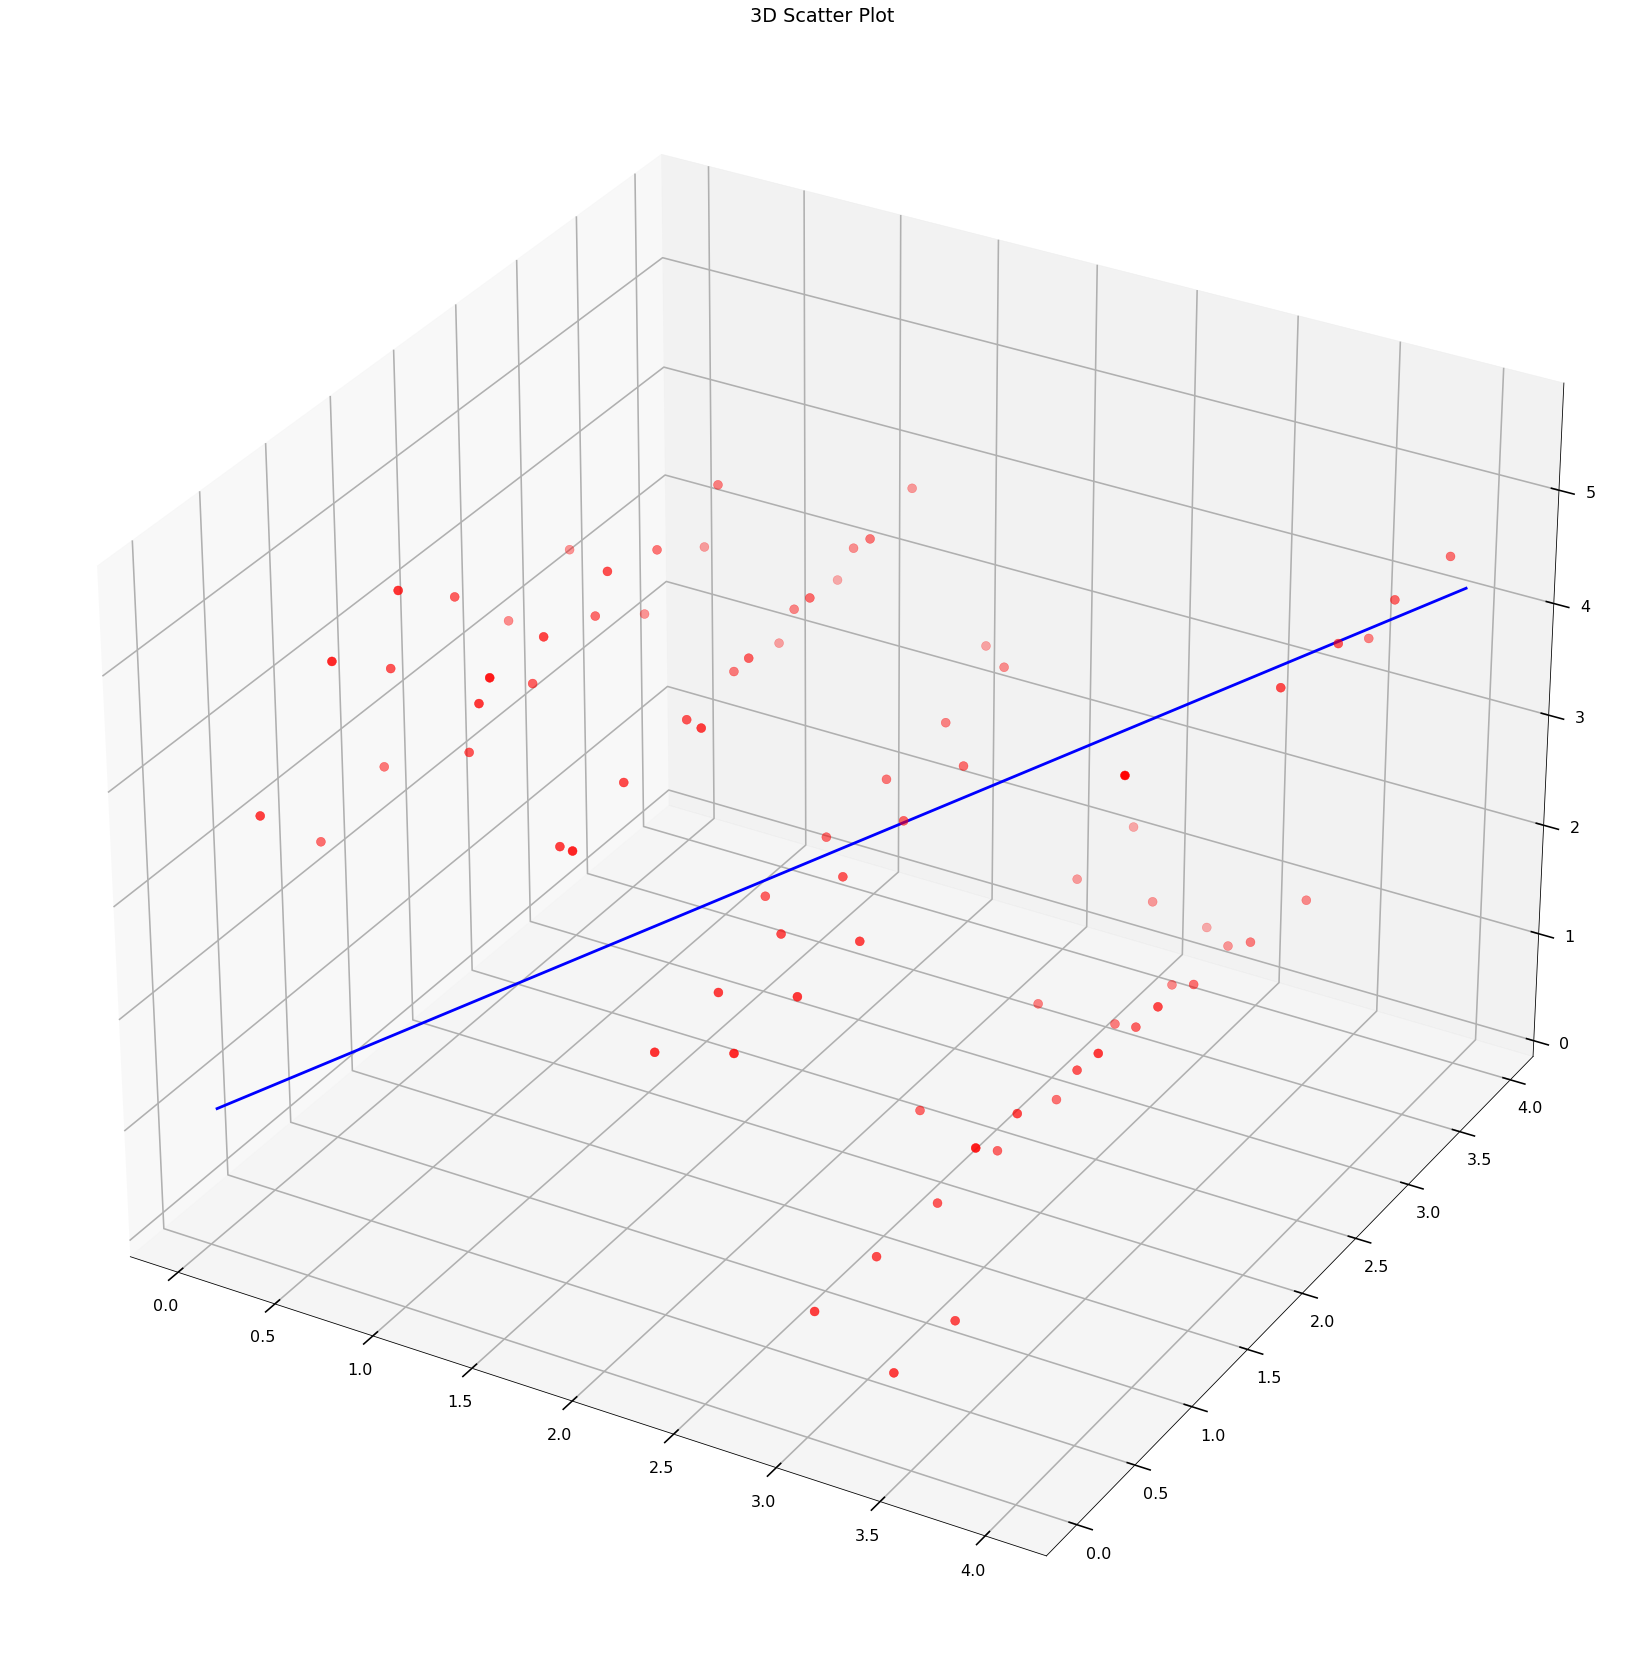

In [19]:
fig = plt.figure(figsize = (30,30))
ax = plt.axes(projection='3d')
X8 = [min(X1), max(X1)]
Y8 = [min(Y2), max(Y2)]
Z7 = [min(hyp2),max(hyp2)]
ax.plot3D(X8, Y8, Z7, 'Blue')
ax.scatter(X1, Y2, Z, c = 'red', s = 80)
ax.set_title('3D Scatter Plot')
plt.show()

### 2.2.3. 3rd 3D visualization between Scale of Efficiency, Level of interest and then my hypothesis function

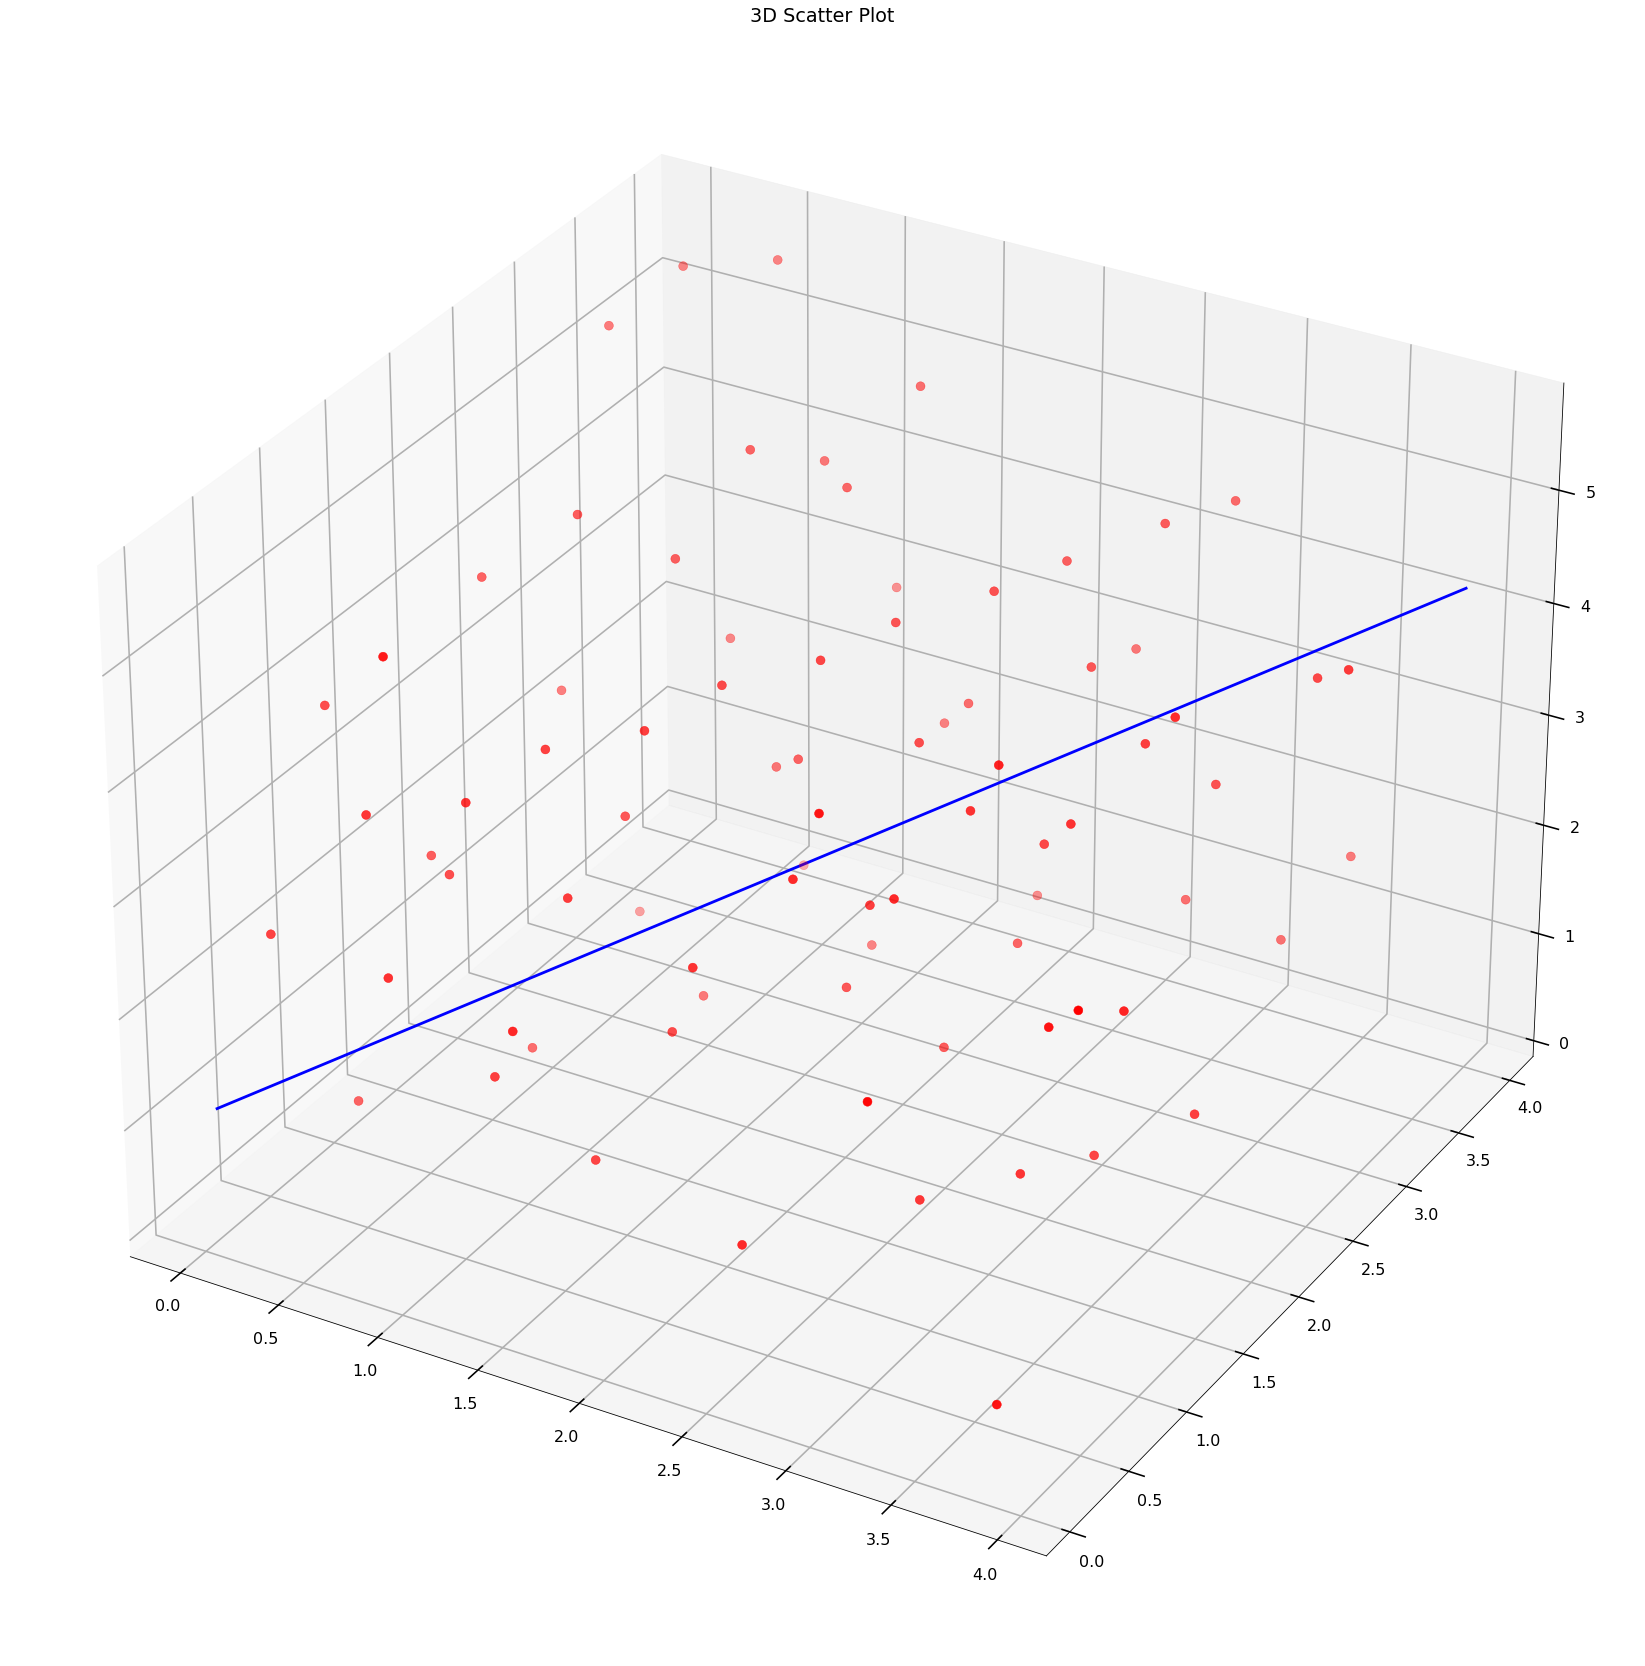

In [20]:
fig = plt.figure(figsize = (30,30))
ax = plt.axes(projection='3d')
X9 = [min(Y2), max(Y2)]
Y9 = [min(X2), max(X2)]
Z8 = [min(hyp2),max(hyp2)]
ax.plot3D(X9, Y9, Z8, 'Blue')
ax.scatter(Y2, X2, Z, c = 'red', s = 80)
ax.set_title('3D Scatter Plot')
plt.show()

## 2.3. Third Exploration
### Within this exploration i have made a visual of how the cost is affected by the 3 features which i have after 10000 iterations and also the second learning rate i am using is fairly high compared to the two i used above, a = 0.01. I have also went further to explore how the hypothesis function would be plotted against 2 features.
### With this learning rate i asssume convergence from 500 iterations onwards.

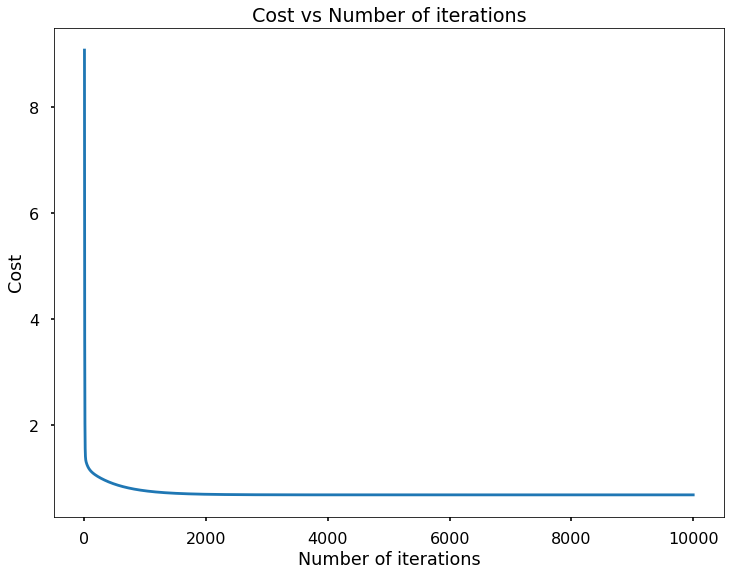

Number of Interation(s): 10000
Learning Rate(Alpha): 0.01
Lowest cost: 0.6888601153343119
Theta obtained from the grad descent: [ 3.9056635  -0.64237565  0.24177887 -0.02633955]


In [21]:
learning_rate3 = 0.01
cost3, hyp3, theta3 = grad_desc(X, Y, learning_rate3, num_itr)
plt.title("Cost vs Number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.plot(cost3)
plt.show()
print('Number of Interation(s):', num_itr)
print('Learning Rate(Alpha):', learning_rate3)
print('Lowest cost:', str(np.min(cost3)))
print('Theta obtained from the grad descent:', theta3)

### 2.3.1. 1st 3D visualization between Years of Experience, level of interest and then my hypothesis function

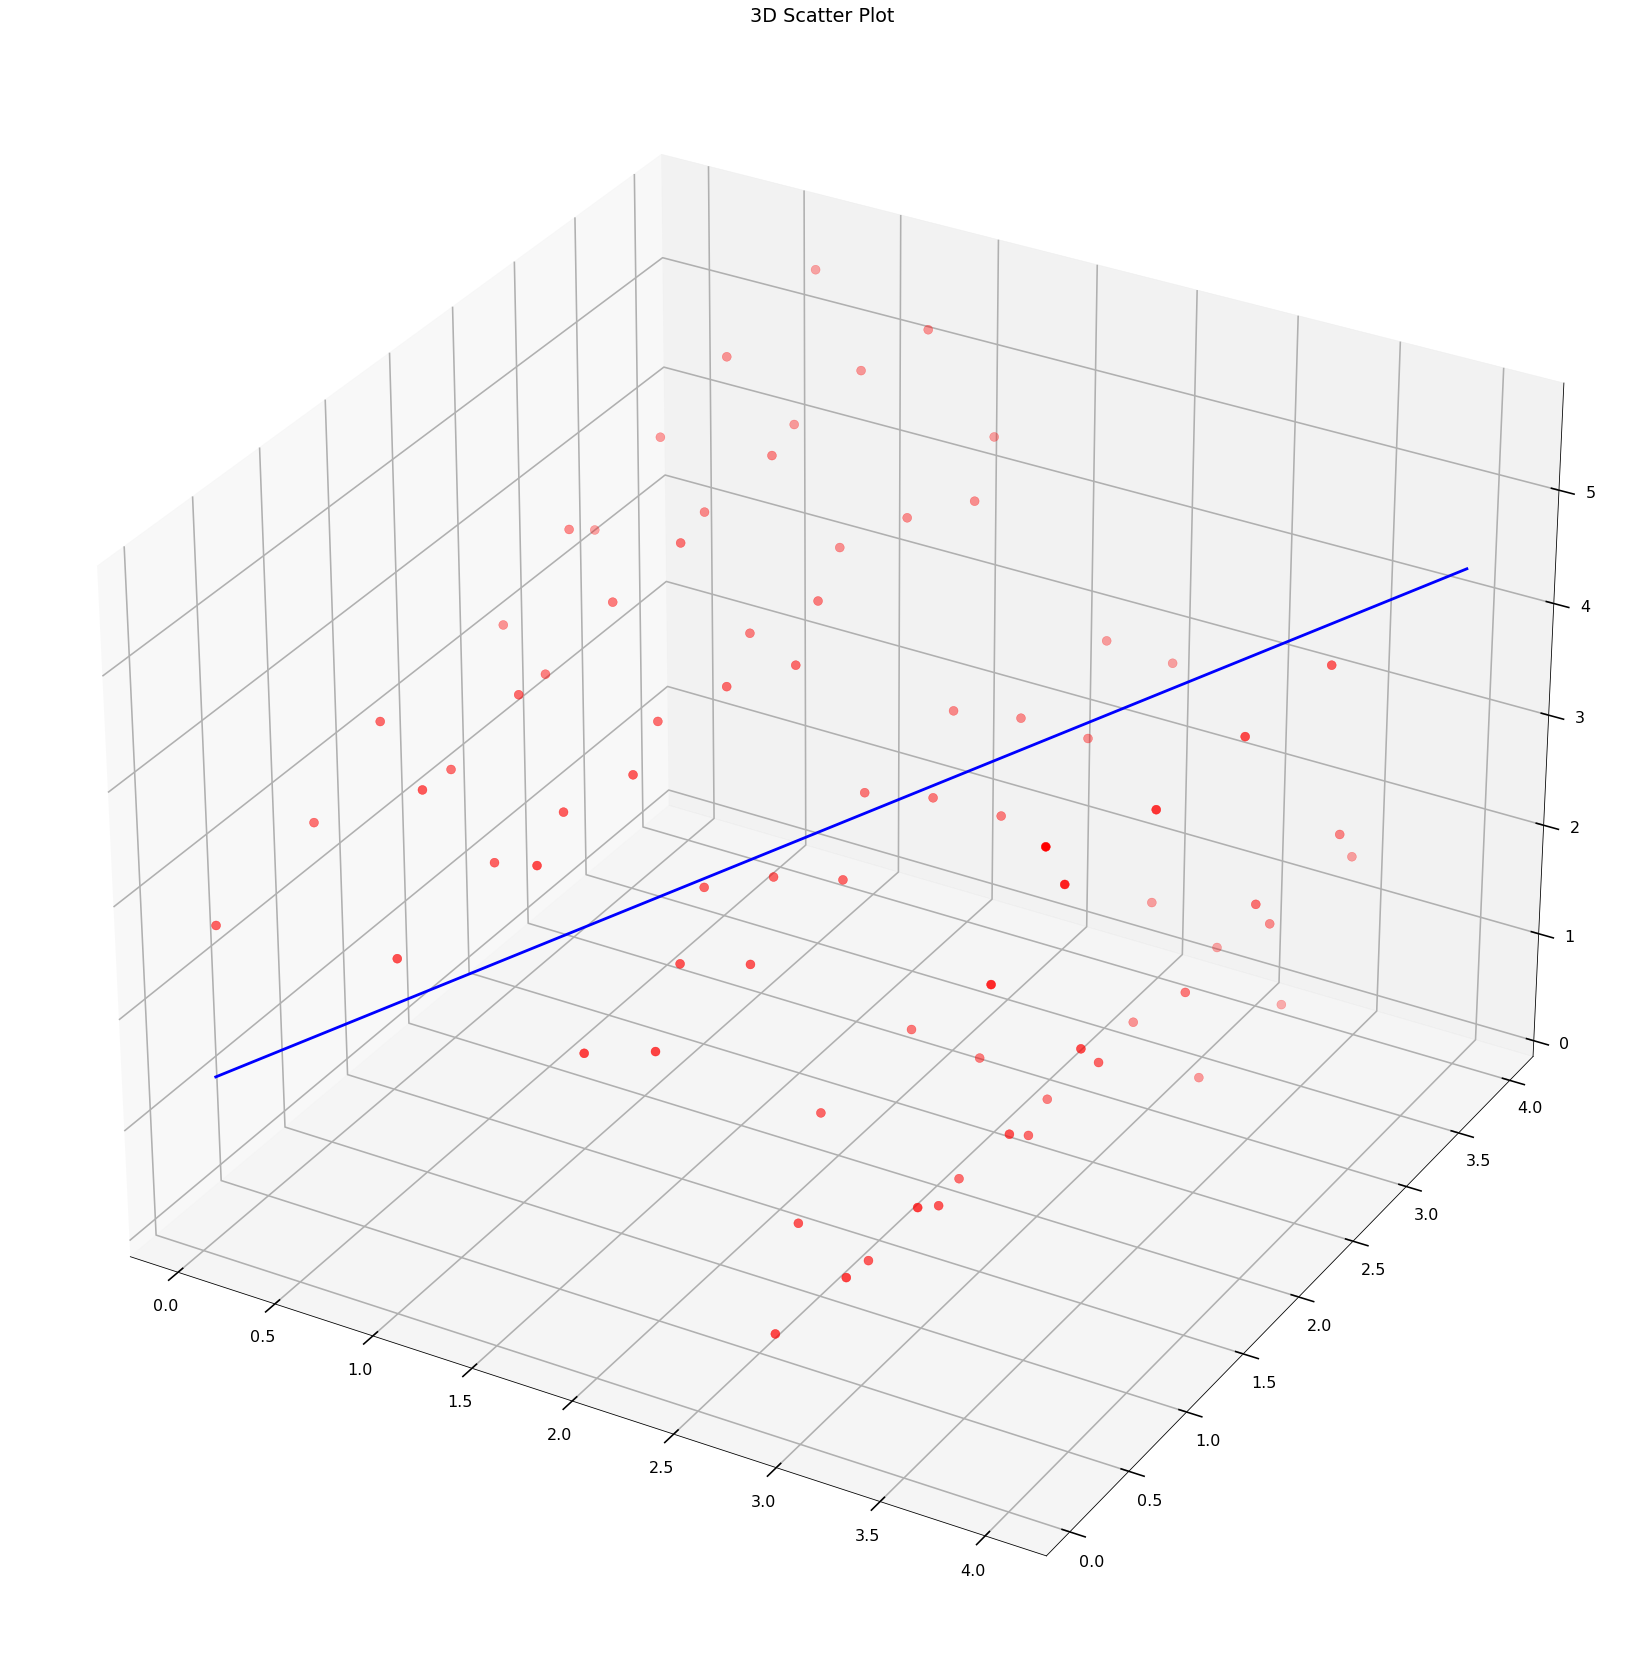

In [22]:
fig = plt.figure(figsize = (30,30))
ax = plt.axes(projection='3d')
X10 = [min(X1), max(X1)]
Y10 = [min(X2), max(X2)]
Z9 = [min(hyp3),max(hyp3)]
ax.plot3D(X10, Y10, Z9, 'Blue')
ax.scatter(X1, X2, Z, c = 'red', s = 80)
ax.set_title('3D Scatter Plot')
plt.show()

### 2.3.2 2nd 3D visualization between Years of Experience, Scale of Efficiency and then my hypothesis function

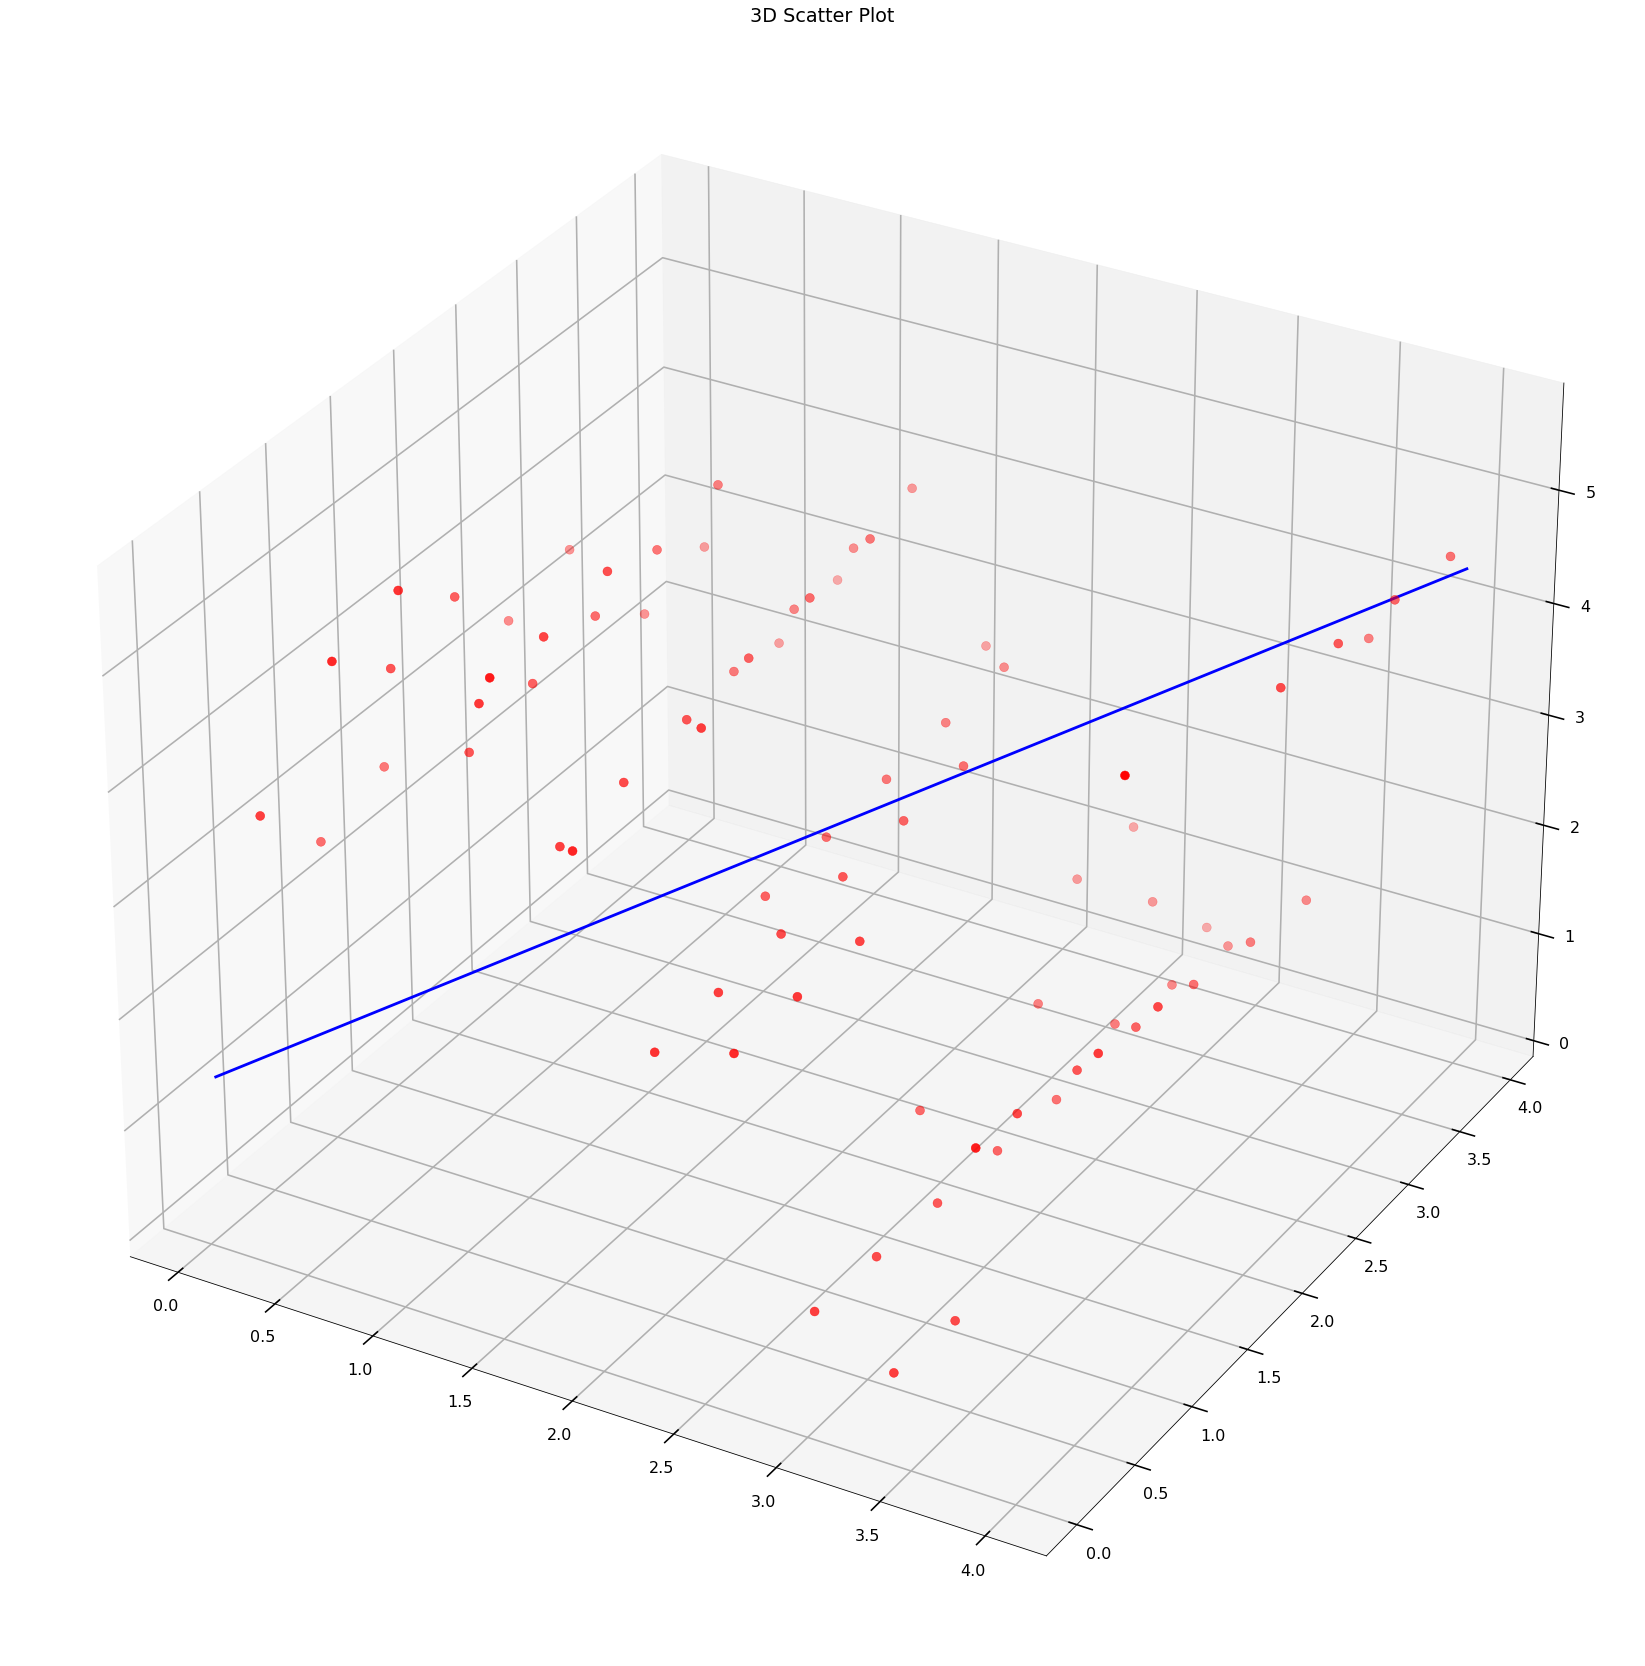

In [23]:
fig = plt.figure(figsize = (30,30))
ax = plt.axes(projection='3d')
X11 = [min(X1), max(X1)]
Y11 = [min(Y2), max(Y2)]
Z10 = [min(hyp3),max(hyp3)]
ax.plot3D(X11, Y11, Z10, 'Blue')
ax.scatter(X1, Y2, Z, c = 'red', s = 80)
ax.set_title('3D Scatter Plot')
plt.show()

### 2.3.3. 3rd 3D visualization between Scale of Efficiency, Level of interest and then my hypothesis function

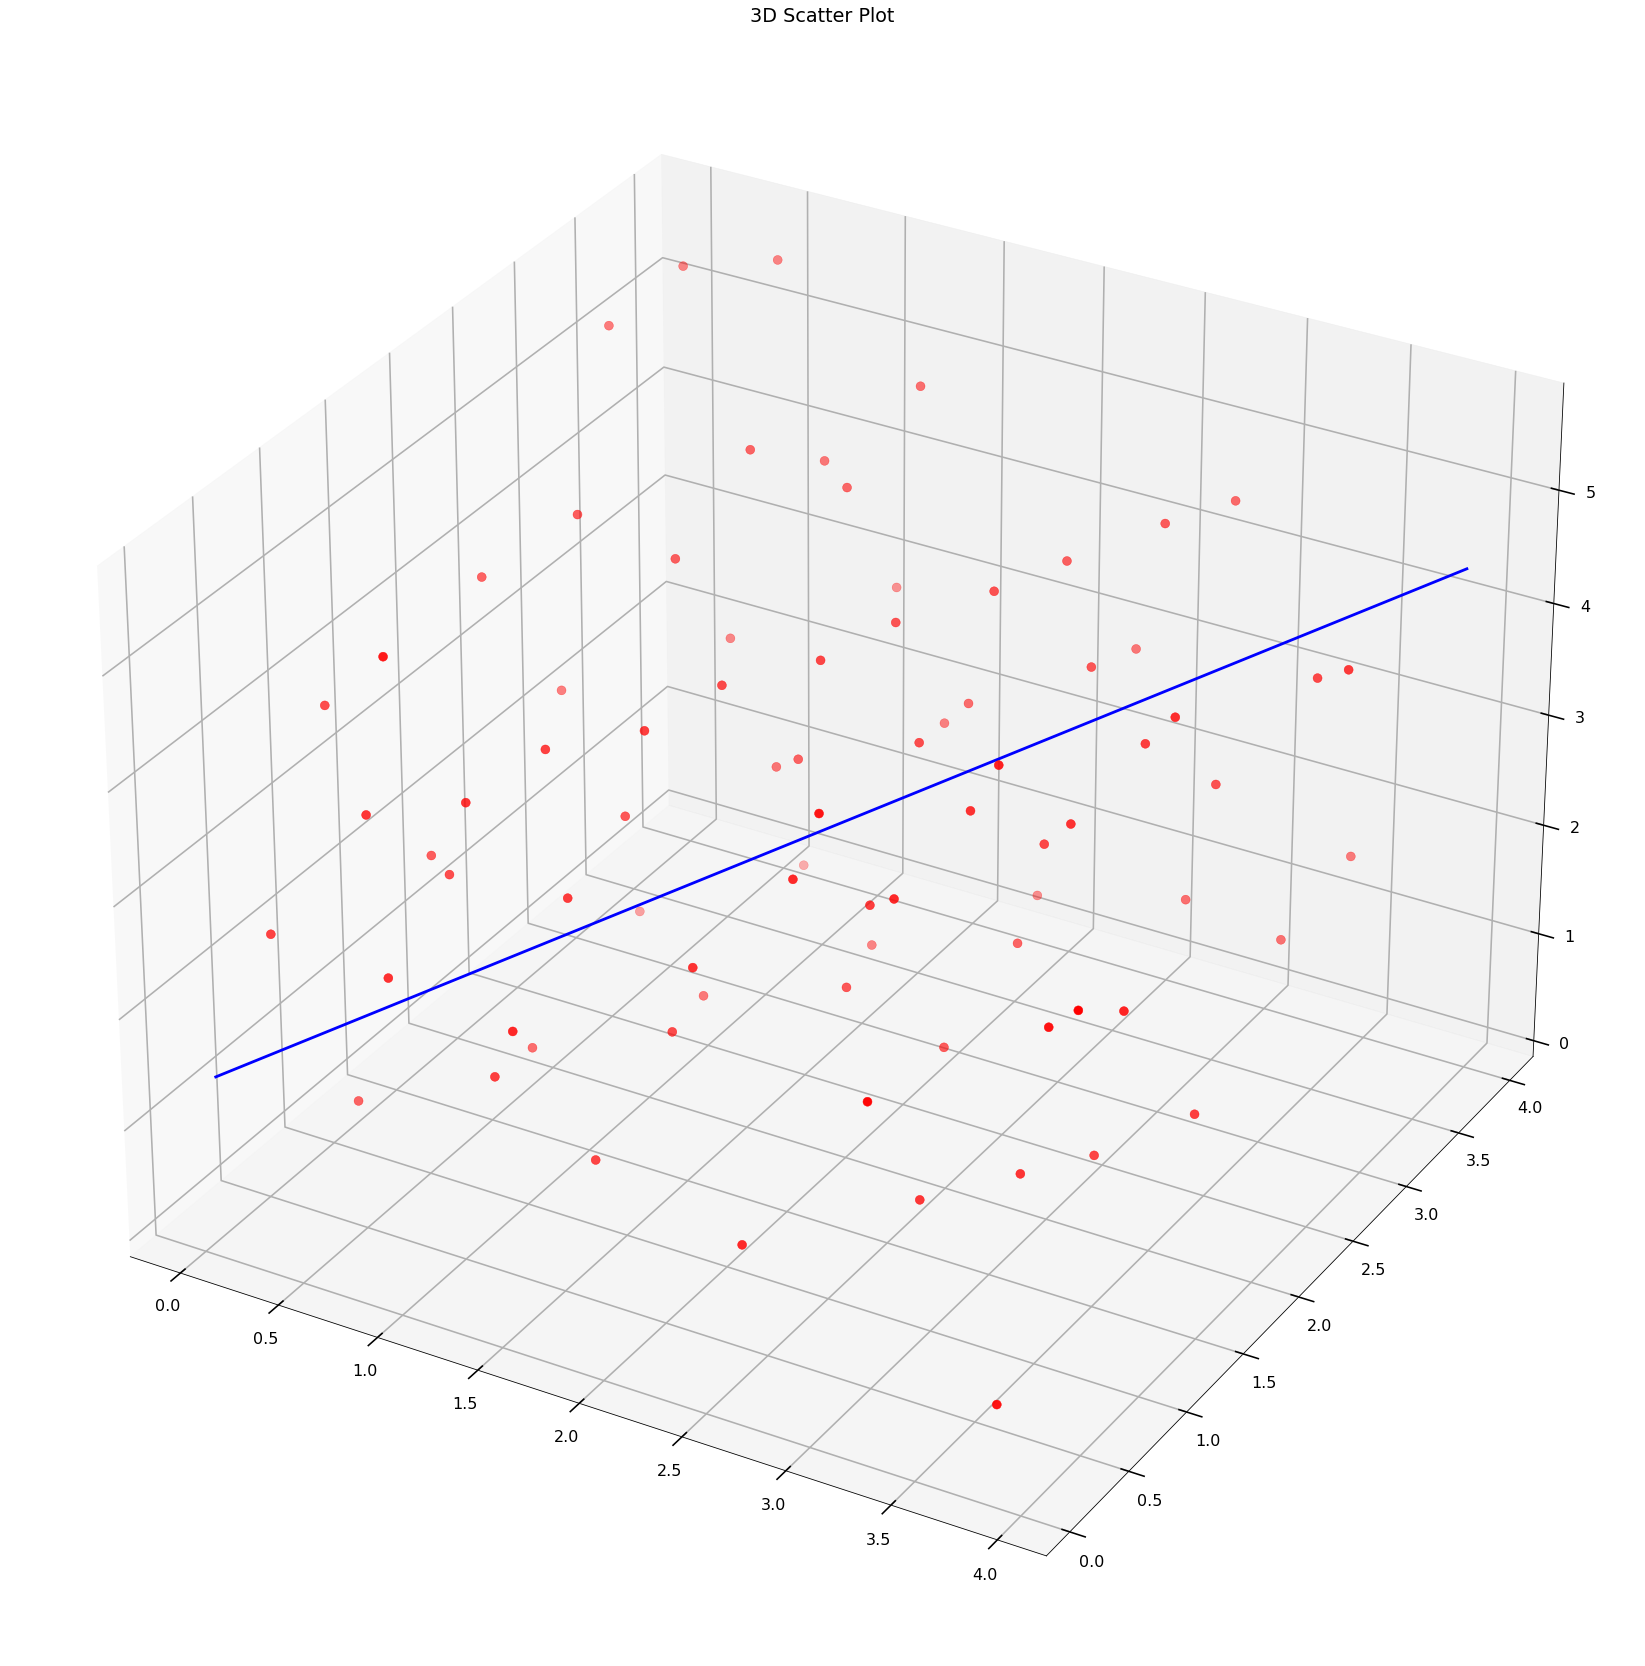

In [24]:
fig = plt.figure(figsize = (30,30))
ax = plt.axes(projection='3d')
X12 = [min(Y2), max(Y2)]
Y12 = [min(X2), max(X2)]
Z11 = [min(hyp3),max(hyp3)]
ax.plot3D(X12, Y12, Z11, 'Blue')
ax.scatter(Y2, X2, Z, c = 'red', s = 80)
ax.set_title('3D Scatter Plot')
plt.show()

# 3.1. Implementation of feature Scaling and standardization for improved learning


### From here, i will implement the feature Scaling.
#### I shall use the Min Max Scaling

In [38]:
def fscaling(x_value):
    for i in range(1, 3):
        X_new = (x_value - x_value.min())/(x_value.max() - x_value.min())
    return X_new

### I will then update the feature's values that i intially have with the feature scaling function i have implemented above

In [42]:
x_s = fscaling(X)

In [43]:
x1_s = x_s[:, 0]
x2_s = x_s[:, 1]
x3_s = x_s[:, 2]

### Below i have shown through the cost vs number of iterations how the cost of the model changes now that the feature scaling process has been applied unto the feature values

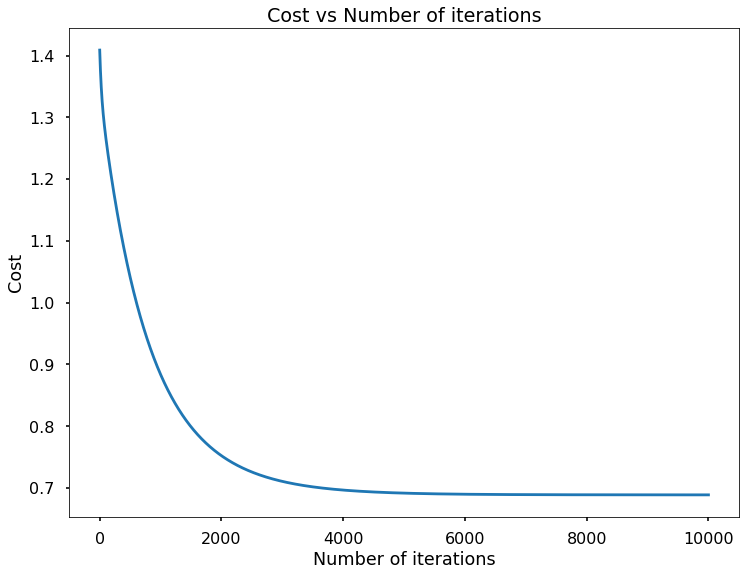

Number of Interation(s): 10000
Learning Rate(Alpha): 0.01
Lowest cost: 0.6888795059176378
Theta obtained from the grad descent: [ 3.87533865 -2.5377378   0.97382084 -0.09710575]


In [45]:
learning_rate1 = 0.01
cost_s, hyp_ss, theta_s = grad_desc(x_s, Y, learning_rate1, num_itr)
plt.title("Cost vs Number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.plot(cost_s)
plt.show()
print('Number of Interation(s):', num_itr)
print('Learning Rate(Alpha):', learning_rate1)
print('Lowest cost:', str(np.min(cost_s)))
print('Theta obtained from the grad descent:', theta_s)

### I have also went further to explore how the hypothesis function would be plotted against 2 features, after implementing the feature scaling procedure

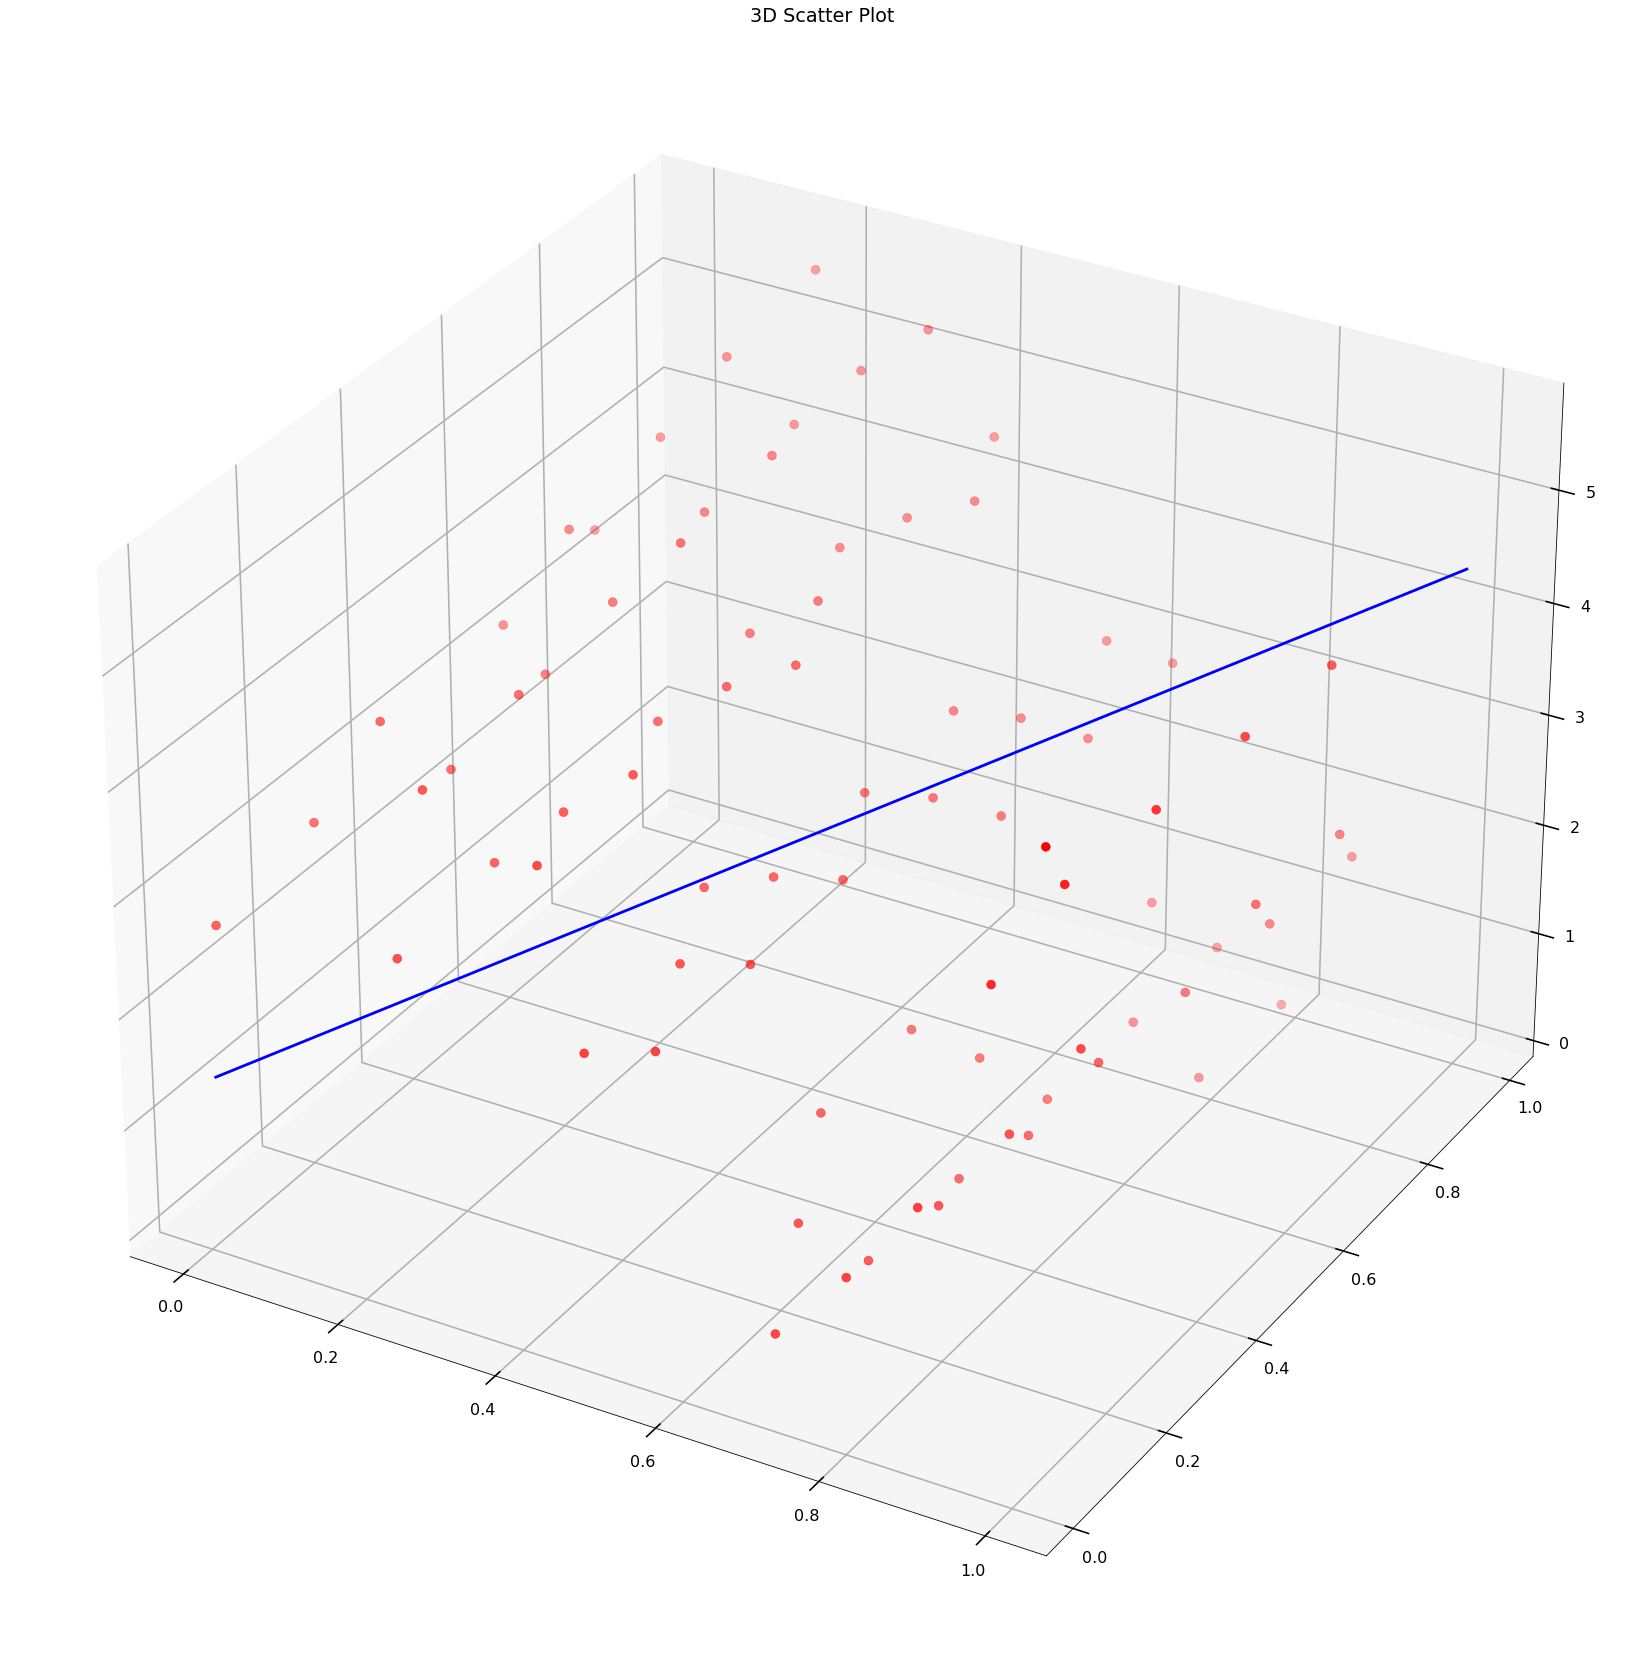

In [48]:
fig = plt.figure(figsize = (30,30))
ax = plt.axes(projection='3d')
x_ss = [min(x1_s), max(x1_s)]
y_ss = [min(x2_s), max(x2_s)]
z_ss = [min(hyp_ss),max(hyp_ss)]
ax.plot3D(x_ss, y_ss, z_ss, 'Blue')
ax.scatter(x1_s, x2_s, Z, c = 'red', s = 80)
ax.set_title('3D Scatter Plot')
plt.show()

### From here, i will implement the feature standardization

In [53]:
def fstandardization(x_value):
    new_x = (x_value - x_value.mean())/x_value.std()

    return new_x
    

### I will then update the feature's values that i intially have with the feature standardization function i have implemented above

In [54]:
X_up = fstandardization(X)

In [55]:
x1_up = X_up[:, 0]
x2_up = X_up[:, 1]
x3_up = X_up[:, 2]

### Below i have shown through the cost vs number of iterations how the cost of the model changes now that the feature standardization process has been applied unto the feature values

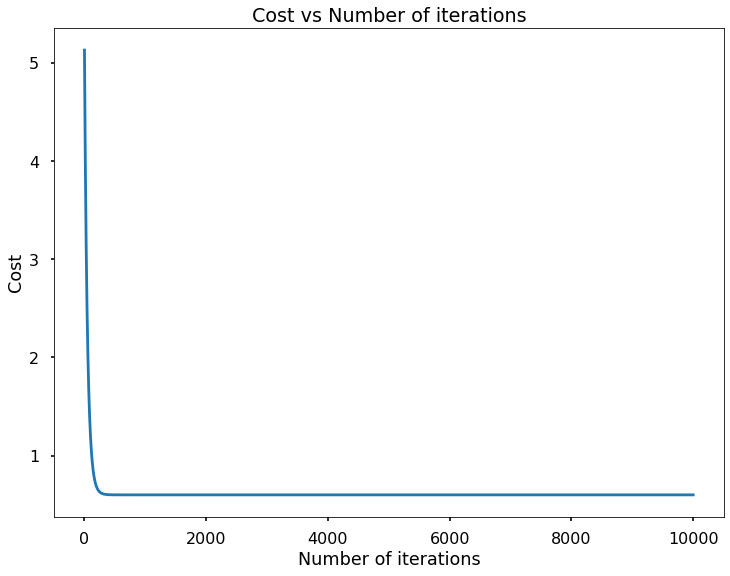

Number of Interation(s): 10000
Learning Rate(Alpha): 0.01
Lowest cost: 0.6002535991667779
Theta obtained from the grad descent: [ 2.96333751 -0.81202397  0.23703655 -0.17336951]


In [56]:
learning_rate1 = 0.01
cost_f, hyp_f, theta_f = grad_desc(X_up, Y, learning_rate1, num_itr)
plt.title("Cost vs Number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.plot(cost_f)
plt.show()
print('Number of Interation(s):', num_itr)
print('Learning Rate(Alpha):', learning_rate1)
print('Lowest cost:', str(np.min(cost_f)))
print('Theta obtained from the grad descent:', theta_f)

###  I have also went further to explore how the hypothesis function would be plotted against 2 features, after implementing the feature standardization procedure

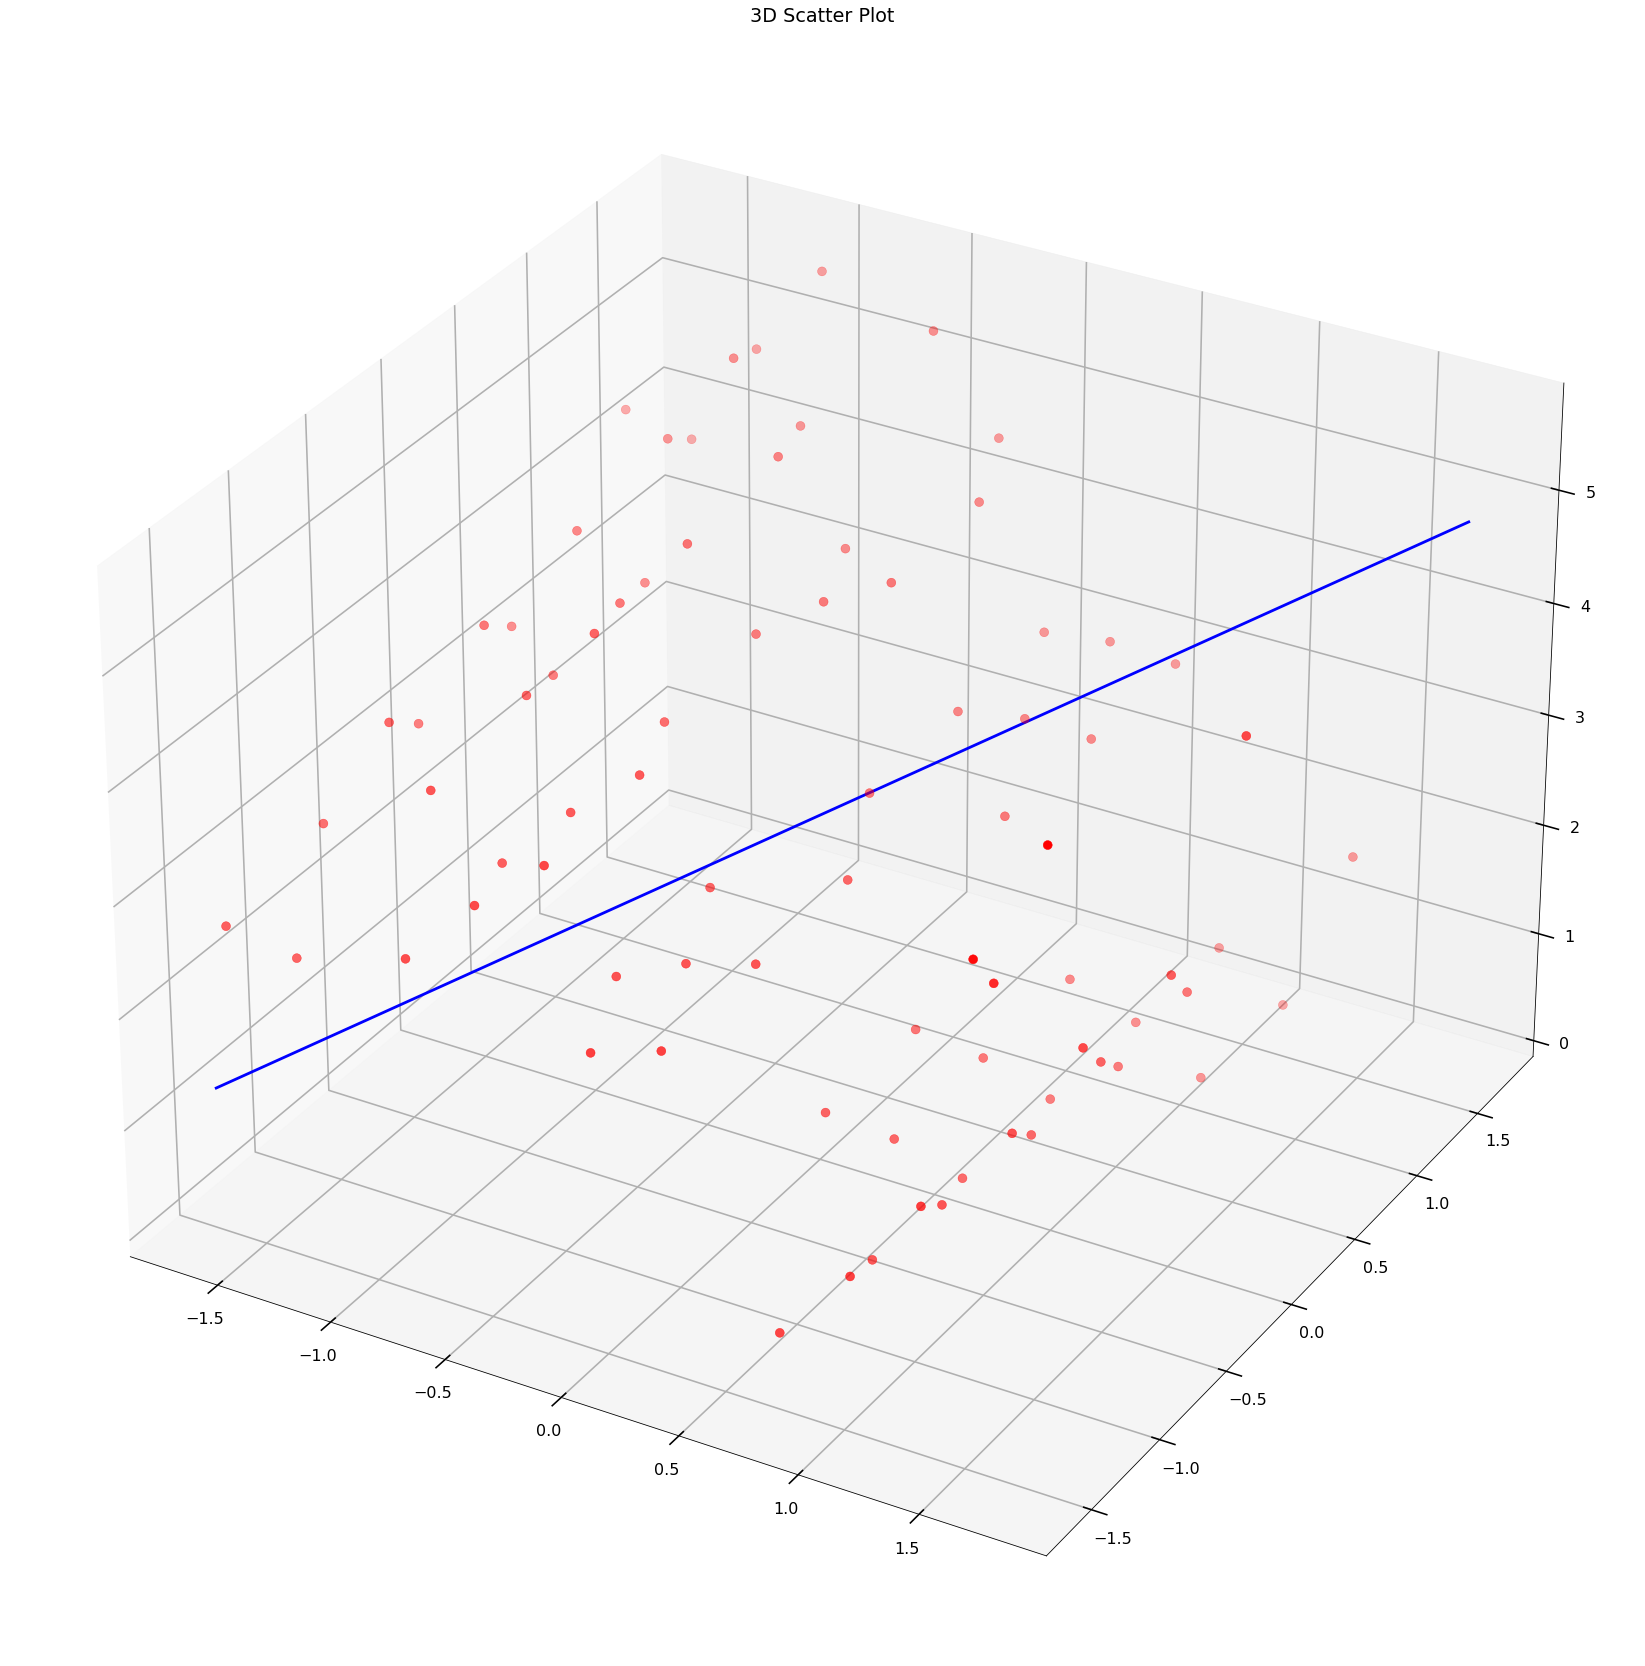

In [57]:
fig = plt.figure(figsize = (30,30))
ax = plt.axes(projection='3d')
x_r = [min(x1_up), max(x1_up)]
y_r = [min(x2_up), max(x2_up)]
z_r = [min(hyp_r),max(hyp_r)]
ax.plot3D(x_r, y_r, z_r, 'Blue')
ax.scatter(x1_up, x2_up, Z, c = 'red', s = 80)
ax.set_title('3D Scatter Plot')
plt.show()

# 3.2. Implementation of Regularization for improved learning

### From here i will implement regularization to the linear regression with gradient descent algorithm in order to automatically control the complexity of learned hypothesis. 

In [58]:
def regularization(x_train, y_train, learning_rate, max_itr):
    n = x_train.shape[0]
    ones = np.ones((n,1))
    x_train = np.concatenate((ones, x_train), axis=1)
    num = x_train.shape[1]
    theta = np.ones(num)
    hyp = np.dot(x_train, theta)
    lambd = 5 
    
    #Multivariate Linear Regression using Gradient Descent code part
    cost = np.ones(max_itr)
    
    for i in range(0, max_itr):
        theta[0] = theta[0] - ((learning_rate/n)*sum(hyp -y_train))
        for j in range(1, num):
            theta[j] = (theta[j])*(1-(learning_rate*lambd)/n) - ((learning_rate/n)*sum((hyp -y_train)*x_train[:, j]))
        hyp = np.dot(x_train, theta)
        cost[i] = (1/(2*n))*(sum(np.square(hyp-y_train))) + lambd*((theta)**2)
    return cost, hyp, theta

### Below i have explored how the cost is affected by the 3 features which i have after 10000 iterations and also the second learning rate i am using is fairly high, and after the results that i have gotten compared to the normal linear regression with gradient descent algorithm, there's a slight difference in the cost and the theta generated by the regularized linear regression with gradient descent algorithm. This then means that i have successfully automatically controlled the learning of the hypothesis

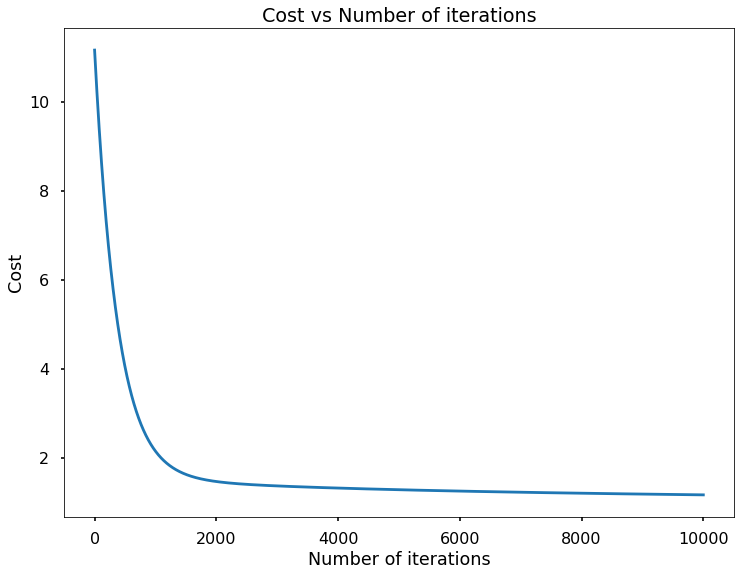

Number of Interation(s): 10000
Learning Rate(Alpha): 0.01
Lowest cost: 0.6002535999560902
Theta obtained from the grad descent: [ 4.1918154  -0.69268688  0.20222712 -0.14787889]


In [59]:
learning_rate1 = 0.01
cost_r, hyp_r, theta_r = grad_desc(X, Y, learning_rate1, num_itr)
plt.title("Cost vs Number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.plot(cost1)
plt.show()
print('Number of Interation(s):', num_itr)
print('Learning Rate(Alpha):', learning_rate1)
print('Lowest cost:', str(np.min(cost_r)))
print('Theta obtained from the grad descent:', theta_r)

## I have also went further to explore how the hypothesis function would be plotted against 2 features, after implementing the  procedure of regularization

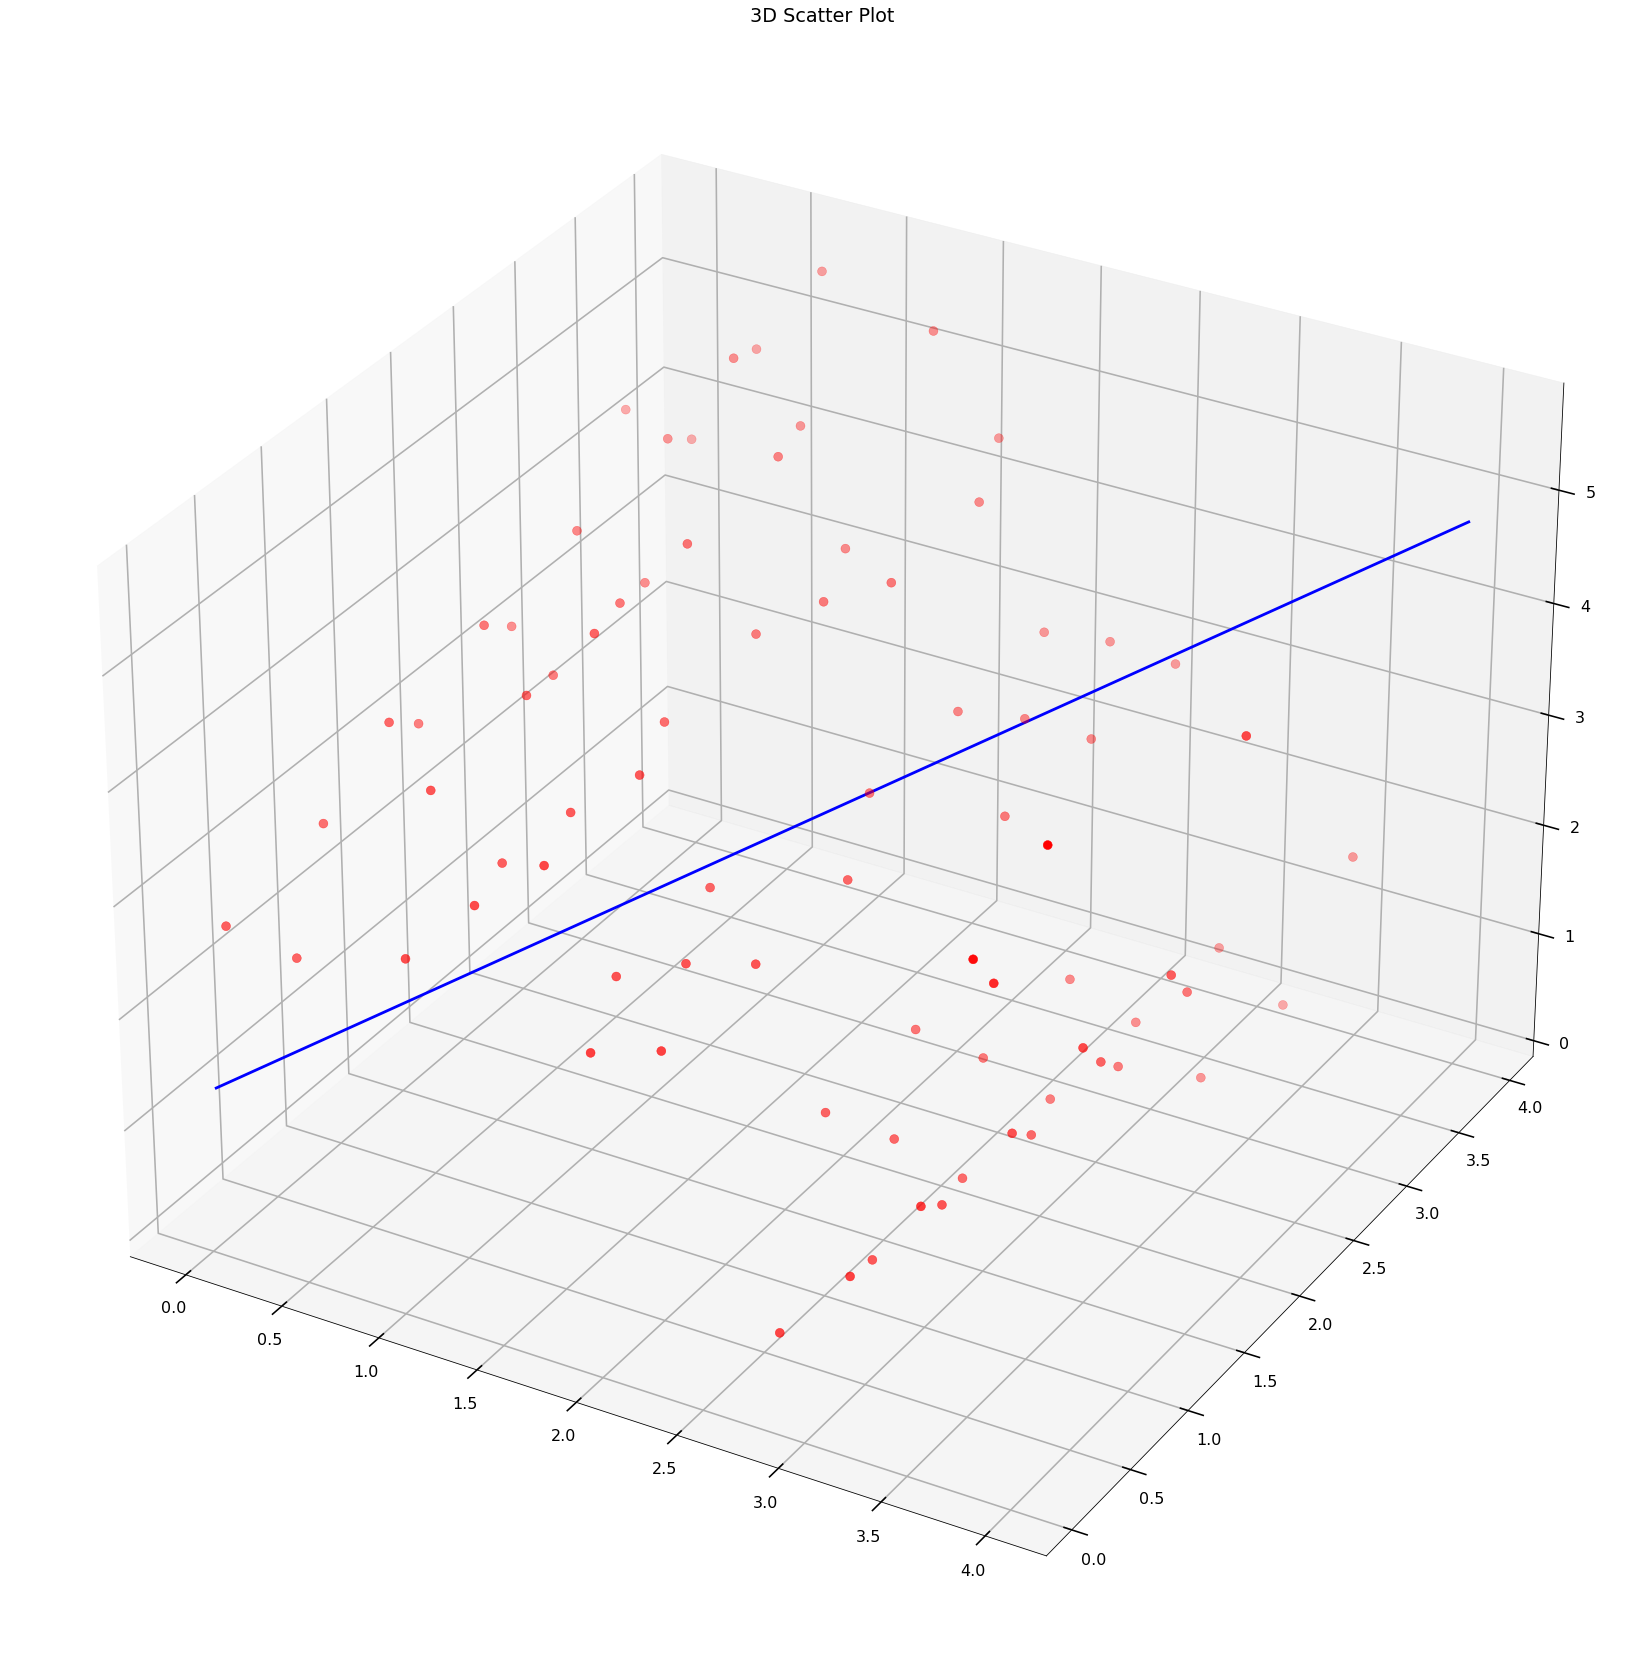

In [60]:
fig = plt.figure(figsize = (30,30))
ax = plt.axes(projection='3d')
X4 = [min(X1), max(X1)]
Y4 = [min(X2), max(X2)]
Z3 = [min(hyp_r),max(hyp_r)]
ax.plot3D(X4, Y4, Z3, 'Blue')
ax.scatter(X1, X2, Z, c = 'red', s = 80)
ax.set_title('3D Scatter Plot')
plt.show()